<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos · PEC1</p>
<p style="margin: 0; text-align:right;">2021-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 1: Preparación de datos

A lo largo de esta práctica veremos como aplicar distintas técnicas para la carga y preparación de datos:

 <ol start="1">
  <li>Carga de conjuntos de datos</li>
  <li>Análisis de los datos
  <br>2.1 Análisis estadístico básico
  <br>2.2 Análisis exploratorio de los datos
  <li>Reducción de dimensionalidad</li>
  <li>Entrenamiento y test</li>
</ol>

**Importante:** Cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a html desde el menú File $\to$ Download as $\to$ HTML.

**Importante:** Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de cada PEC. Para cambiar el tipo de celda a este tipo, en el menú: Cell $\to$ Cell Type $\to$ Markdown.
   
Para ello vamos a necesitar las siguientes librerías:

In [1692]:
from six import StringIO

from IPython.display import Image 
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import pydotplus
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)

# 1. Carga del conjunto de datos (1 punto)

En primer lugar, deberéis cargar el conjunto de datos Breast Cancer Wisconsin (más información en https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Éste se puede descargar de Internet o puede ser cargado directamente usando una librería de "scikit-learn", que incorpora un conjunto de datasets muy conocidos y empleados para minería de datos y machine learning (https://scikit-learn.org/stable/datasets.html).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> cargad el conjunto de datos "Breast Cancer Wisconsin" y mostrad:
   <br> - El número y nombre de los atributos (variables que podrían ser usadas para predecir la respuesta "Diagnosis")
    <br> - El número de filas obtenidas
    <br> - Verificad si hay o no datos que faltan ("missing values") y en qué columnas
<hr>
Sugerencia: si usáis sklearn (sklearn.datasets.load_breast_cancer), explorad las diferentes keys del objeto obtenido.

Sugerencia: quizá os resulta útil pasar los datos (atributos + target) a un dataframe de pandas.
</div>

In [722]:
# Importar dataset mediante la librería de "scikit-learn"
from sklearn.datasets import load_breast_cancer
data, target = load_breast_cancer(return_X_y = True, as_frame = True)

# Convertir target en DataFrame
target = pd.DataFrame(target)
target.dtypes

target    int32
dtype: object

In [723]:
# Cambiar tipo de datos a categórico
target = target.astype('category')
print(target.dtypes)
target

target    category
dtype: object


target
0        0
1        0
2        0
3        0
4        0
..     ...
564      0
565      0
566      0
567      0
568      1

[569 rows x 1 columns]

In [724]:
# Cambiar valores tal que 0 = Benigno y 1 = Maligno
target["target"].replace({0:"M", 1:"B"}, inplace=True)
target

target
0        M
1        M
2        M
3        M
4        M
..     ...
564      M
565      M
566      M
567      M
568      B

[569 rows x 1 columns]

In [725]:
# Consolidar el target y los atributos en un solo DataFrame
bcw = pd.concat([target, data], axis=1)

#Cambiar nombre de la columna target por "diagnosis"
bcw = bcw.rename(columns={"target":"diagnosis"})
bcw

diagnosis  mean radius  mean texture  mean perimeter  mean area  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     mean smoothness  mean compactness  mean concavity  mean concave points  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     mean symmetry  mean fractal dimension  radius error  texture error  \
0           0.2419                 0.07871        1.0950         0.9053   
1           0.1812                 0.05667        0.5435         0.7339   
2           0.2069                 0.05999        0.7456         0.7869   
3           0.2597                 0.09744        0.4956         1.1560   
4           0.1809                 0.05883        0.7572         0.7813   
..             ...                     ...           ...            ...   
564         0.1726                 0.05623        1.1760         1.2560   
565         0.1752                 0.05533        0.7655         2.4630   
566         0.1590                 0.05648        0.4564         1.0750   
567         0.2397                 0.07016        0.7260         1.5950   
568         0.1587                 0.05884        0.3857         1.4280   

     perimeter error  area error  smoothness error  compactness error  \
0              8.589      153.40          0.006399            0.04904   
1              3.398       74.08          0.005225            0.01308   
2              4.585       94.03          0.006150            0.04006   
3              3.445       27.23          0.009110            0.07458   
4              5.438       94.44          0.011490            0.02461   
..               ...         ...               ...                ...   
564            7.673      158.70          0.010300            0.02891   
565            5.203       99.04          0.005769            0.02423   
566            3.425       48.55          0.005903            0.03731   
567            5.772       86.22          0.006522            0.06158   
568            2.548       19.15          0.007189            0.00466   

     concavity error  concave points error  symmetry error  \
0            0.05373               0.01587         0.03003   
1            0.01860               0.01340         0.01389   
2            0.03832               0.02058         0.02250   
3            0.05661               0.01867         0.05963   
4            0.05688               0.01885         0.01756   
..               ...                   ...          

In [726]:
bcw.dtypes

diagnosis                   object
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points

<font color=#0565A5>Vamos a modificar el tipo de datos de la columna target a categórico, puesto que al crear el dataframe conjunto se ha establecido como objeto.

In [727]:
bcw["diagnosis"] = bcw.diagnosis.astype('category')
bcw.dtypes

diagnosis                  category
mean radius                 float64
mean texture                float64
mean perimeter              float64
mean area                   float64
mean smoothness             float64
mean compactness            float64
mean concavity              float64
mean concave points         float64
mean symmetry               float64
mean fractal dimension      float64
radius error                float64
texture error               float64
perimeter error             float64
area error                  float64
smoothness error            float64
compactness error           float64
concavity error             float64
concave points error        float64
symmetry error              float64
fractal dimension error     float64
worst radius                float64
worst texture               float64
worst perimeter             float64
worst area                  float64
worst smoothness            float64
worst compactness           float64
worst concavity             

In [728]:
# Mostrar nº de filas y columnas (atributos)
bcw.shape

(569, 31)

<font color=#0565A5>Como se puede ver, el dataset cuenta con **569 filas** y **30 atributos** (más la columna target), cuyos nombres son los siguientes:

In [729]:
# Mostrar nombre de las columnas (atributos)
bcw.columns

Index(['diagnosis', 'mean radius', 'mean texture', 'mean perimeter',
       'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

<font color=#0565A5>Ahora comprobaremos si existen ***missing values*** en el conjunto de datos.

In [730]:
# Comprobar si existen datos NaN o NULL
if (bcw.isna().sum().sum() + bcw.isnull().sum().sum() == 0):
    print("No hay datos vacíos ni nulos")
else: print("Hay datos vacíos o nulos")

# Mostrar el nº de valores NaN o NULL por columnas y el total
print("\nValores vacíos o nulos por columnas:\n")
print(bcw.isna().sum() + bcw.isnull().sum())

print("\nTotal: ", bcw.isna().sum().sum() + bcw.isnull().sum().sum())

No hay datos vacíos ni nulos

Valores vacíos o nulos por columnas:

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Total:  0


<font color=#0565A5>Como **no hay valores vacíos ni nulos**, no se requiere comprobar cuántos corresponden a vacíos (NaN) y cuántos a nulos (NULL).
Sin embargo, puede que los datos vacíos estén codificados como **0**, por lo que buscaremos estos tipos de datos.

In [731]:
# Mostrar el nº de valores = 0 por columnas y el total
print("\nValores vacíos o nulos por columnas:\n")
print(bcw.isin([0]).sum())

print("\nTotal: ", bcw.isin([0]).sum().sum())


Valores vacíos o nulos por columnas:

diagnosis                   0
mean radius                 0
mean texture                0
mean perimeter              0
mean area                   0
mean smoothness             0
mean compactness            0
mean concavity             13
mean concave points        13
mean symmetry               0
mean fractal dimension      0
radius error                0
texture error               0
perimeter error             0
area error                  0
smoothness error            0
compactness error           0
concavity error            13
concave points error       13
symmetry error              0
fractal dimension error     0
worst radius                0
worst texture               0
worst perimeter             0
worst area                  0
worst smoothness            0
worst compactness           0
worst concavity            13
worst concave points       13
worst symmetry              0
worst fractal dimension     0
dtype: int64

Total:  78


<font color=#0565A5>Vemos que hay **13 registros** que tienen el valor **0** en las columnas ***mean concavity*** y ***mean concave points***, que resultan por tanto en el valor **0** de los atributos derivados de éstas: ***concavity error***, ***concave point error***, ***worst concavity*** y ***worst concave points***.

# 2. Análisis de los datos (3 puntos)

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> realizad un análisis estadístico básico:
    <br> - Ilustrad gráficamente la frecuencia de aparición de las variables categóricas, indicando el número.
    <br> - Calculad para cada atributo numérico del conjunto de datos, su valor medio y desviación estándard. 
<hr>
Sugerencia: podeis usar la librería 'pandas' y sus funciones 'describe' y 'value_counts'
</div>

<font color=#0565A5>Como ya hemos visto anteriormente, solo la columna ***target*** es de tipo categórico, por lo que representaremos los valores de esta columna únicamente.

B    357
M    212
Name: diagnosis, dtype: int64


[Text(0, 0, 'Benigno'), Text(1, 0, 'Maligno')]

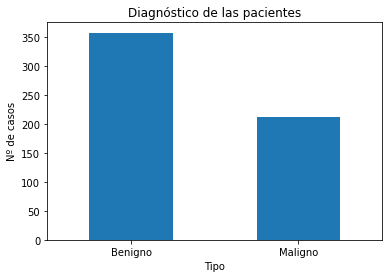

In [805]:
# Graficar valores de la columna "diagnosis"
print(bcw["diagnosis"].value_counts())
bcw["diagnosis"].value_counts().plot(kind="bar", title="Diagnóstico de las pacientes", xlabel="Tipo",
                                  ylabel="Nº de casos").set_xticklabels(["Benigno", "Maligno"], rotation=0)

In [807]:
# Mostrar media y desviación estándar de cada uno de los atributos
bcw.describe().loc[["mean", "std"]]

mean radius  mean texture  mean perimeter   mean area  mean smoothness  \
mean    14.127292     19.289649       91.969033  654.889104         0.096360   
std      3.524049      4.301036       24.298981  351.914129         0.014064   

      mean compactness  mean concavity  mean concave points  mean symmetry  \
mean          0.104341        0.088799             0.048919       0.181162   
std           0.052813        0.079720             0.038803       0.027414   

      mean fractal dimension  radius error  texture error  perimeter error  \
mean                0.062798      0.405172       1.216853         2.866059   
std                 0.007060      0.277313       0.551648         2.021855   

      area error  smoothness error  compactness error  concavity error  \
mean   40.337079          0.007041           0.025478         0.031894   
std    45.491006          0.003003           0.017908         0.030186   

      concave points error  symmetry error  fractal dimension error  \
mean              0.011796        0.020542                 0.003795   
std               0.006170        0.008266                 0.002646   

      worst radius  worst texture  worst perimeter  worst area  \
mean     16.269190      25.677223       107.261213  880.583128   
std       4.833242       6.146258        33.602542  569.356993   

      worst smoothness  worst compactness  worst concavity  \
mean          0.132369           0.254265         0.272188   
std           0.022832           0.157336         0.208624   

      worst concave points  worst symmetry  worst fractal dimension  
mean              0.114606        0.290076                 0.083946  
std               0.065732        0.061867                 0.018061

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comentad los resultados.
</div>

<font color=#0565A5>Al ser todos los atributos de tipo numérico, se puede aplicar la estadística descriptiva sobre cada uno de ellos. De esta forma obtenemos medidas como la media y la desviación estándar de todos los registros por cada atributo individual. Con estas medidas nos podemos hacer una idea de la magnitud y distribución de las variable. Por ejemplo, sabemos que la media del radio de todas las mediciones es 14.127, con una desviación estándar de 3.524. Conocer la distribución de los datos es el primer paso para un futuro análisis más profundo, mediante el que podamos obtener conclusiones más complejas.

## 2.2 Análisis exploratorio de los datos

En este ejercicio vamos a explorar la relación de algunos de los atributos numéricos con la variable respuesta ("Diagnosis"), tanto gráficamente como cuantitativamente y analizaremos las distintas correlaciones. Para empezar, seleccionad los 4 atributos que queréis explorar. Si habéis usado los nombres de columnas proporcionados por sklearn, una lista de posibles nombres de atributos serían:

In [808]:
feats_to_explore = ['mean radius', 'mean texture', 'mean smoothness', 'mean symmetry']

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> utilizando una librería gráfica, como por ejemplo "matplotlib", realizad un gráfico del histograma de valores para cada uno de los atributos seleccionados, separados por los valores de clase de la respuesta ("Diagnosis"). 
    
 La finalidad es observar como se distribuye cada uno de los atributos en función del valor de clase que toman, para poder identificar de forma visual y rápida si algunos atributos permiten diferenciar de forma clara los diferentes diagnósticos de los tumores.
<hr>
Sugerencia: podéis usar el parámetro "alpha" en los gráficos para que se aprecien los dos histogramas.
</div>

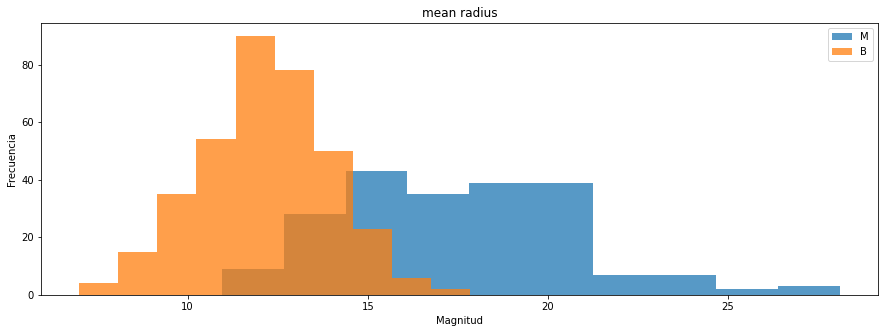

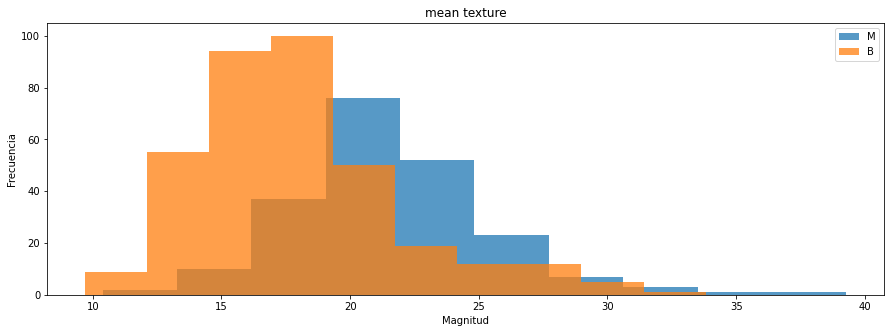

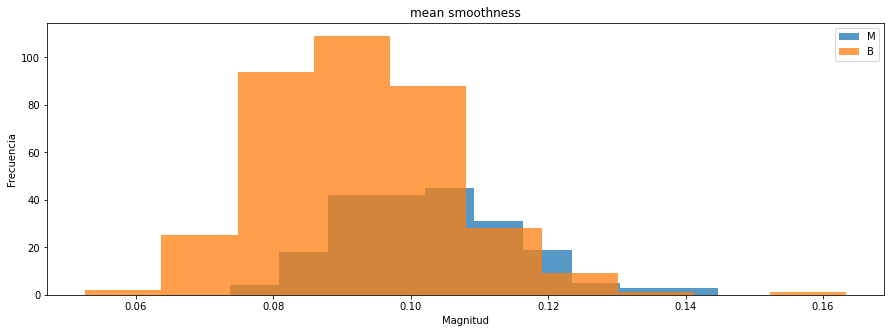

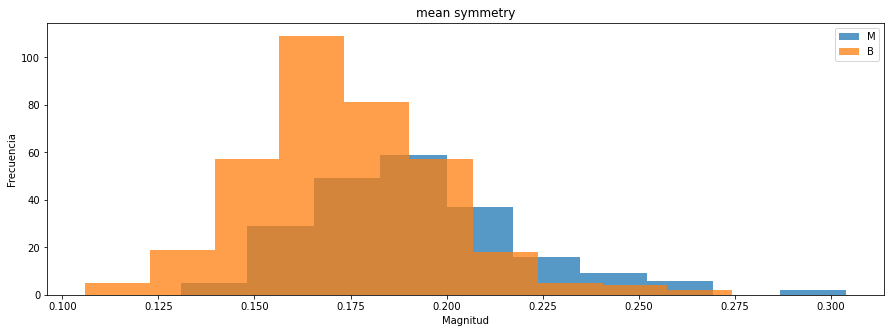

In [961]:
# Crear 4 gráficos, 1 por cada variable
for i in range(len(feats_to_explore)):
    plt.figure(figsize=(15,5))
    plt.title(feats_to_explore[i])
    # Cada gráfico debe dividir los registros según los valores de la clase (diagnosis) y mostrarlos de forma separada
    for j in bcw["diagnosis"].unique():
        plt.hist(bcw[feats_to_explore[i]].loc[bcw["diagnosis"]==j], alpha=.75)
    plt.legend(bcw["diagnosis"].unique())
    plt.xlabel("Magnitud")
    plt.ylabel("Frecuencia")
    plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> mirando los gráficos, ¿qué atributos te parece que tienen valores claramente diferentes para diagnósticos benignos y malignos? ¿Qué atributos no?</div>

<font color=#0565A5>De los 4 atributos, ***mean radius*** es el que mejor separa los valores del diagnóstico debido a la pequeña intersección entre las medidas con diagnóstico benigno y con diagnóstico maligno. Se puede apreciar que las pacientes con un radio menor de 14 tienen altas probabilidades de tener un diagnóstico benigno, mientras que si el radio es mayor que 14 las probabilidades de tener un diagnóstico maligno son muy elevadas.

<font color=#0565A5>Con algo más de incertidumbre, especialmente en los valores centrales de la distribución, ***mean textue*** podría separar los registros según la clase con relativa claridad, aunque la área superpuesta por ambos histogramas es mayor que en anterior caso.

<font color=#0565A5>Por otro lado, en cuanto al atributo ***mean smoothness***, las probabilidades de recibir un falso positivo son muy altas debido a que casi todos los pocos casos de diagnóstico maligno se superponen con los de diagnóstico benigno.

<font color=#0565A5>Al igual que en el caso anterior, el atributo ***mean symmetry*** no da apenas información por sí mismo acerca del diagnóstico. Esto se debe al gran área superpuesta entre las pacientes que reciben distintos diagnósticos, siendo este atributo junto a ***mean smoothness*** los peores de los 4 atributos analizados para establecer este tipo de conclusiones.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> para cada uno de los atributos representados en el ejercicio anterior, mostrad la media y la desviación estándard para cada valor de clase de la respuesta. 
    
La finalidad es verificar numéricamente las diferencias identificadas anteriormente de forma visual.
</div>

In [925]:
# Obtenemos la media y la desviación estándar de los atributos para los diagnósticos benignos
print("Casos con diagnóstico BENIGNO")
bcw[feats_to_explore].loc[bcw["diagnosis"]=="B"].describe().loc[["mean", "std"]]

Casos con diagnóstico BENIGNO


mean radius  mean texture  mean smoothness  mean symmetry
mean    12.146524     17.914762         0.092478       0.174186
std      1.780512      3.995125         0.013446       0.024807

In [926]:
# Obtenemos la media y la desviación estándar de los atributos para los diagnósticos malignos
print("Casos con diagnóstico MALIGNO")
bcw[feats_to_explore].loc[bcw["diagnosis"]=="M"].describe().loc[["mean", "std"]]

Casos con diagnóstico MALIGNO


mean radius  mean texture  mean smoothness  mean symmetry
mean    17.462830     21.604906         0.102898       0.192909
std      3.203971      3.779470         0.012608       0.027638

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> mirando a los valores medios y desviaciones estándard calculadas, ¿te parecen significativas las diferencias para diagnósticos benignos y malignos?</div>

<font color=#0565A5>Observando las distribuciones mediante la media y la desviación estándar se hace más evidente cuáles atributos dan más información sobre la clase y cuáles menos. ***Mean radius*** y ***mean texture*** presentan una mayor diferencia en su media dependiento del tipo de diagnóstico, con una desviación estándar los suficientemente pequeña como para saber que la distribución de los datos podrían determinar la clase con una incertidumbre relativamente baja.

<font color=#0565A5>También se evidencia con los atributos ***mean smoothness*** y ***mean symmetry*** presentan una media y una distribución muy similar en ambas categorías de diagnóstico.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> calculad y mostrad la correlación entre todas las variables del conjunto de datos.
</div>

In [956]:
# Obtener la matriz de correlación con todos los atributos
bcw.corr()

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error            0.380676          0.642262        0.683260   
symmetry error                 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> representad gráficamente las relaciones entre todas las parejas de las variables "mean" del conjunto de datos.

La finalidad de este ejercicio es poder observar y analizar las correlaciones de manera gráfica entre algunas de las variables.
<hr>Sugerencia: podéis usar la función "pairplot" de la librería 'seaborn'.
</div>

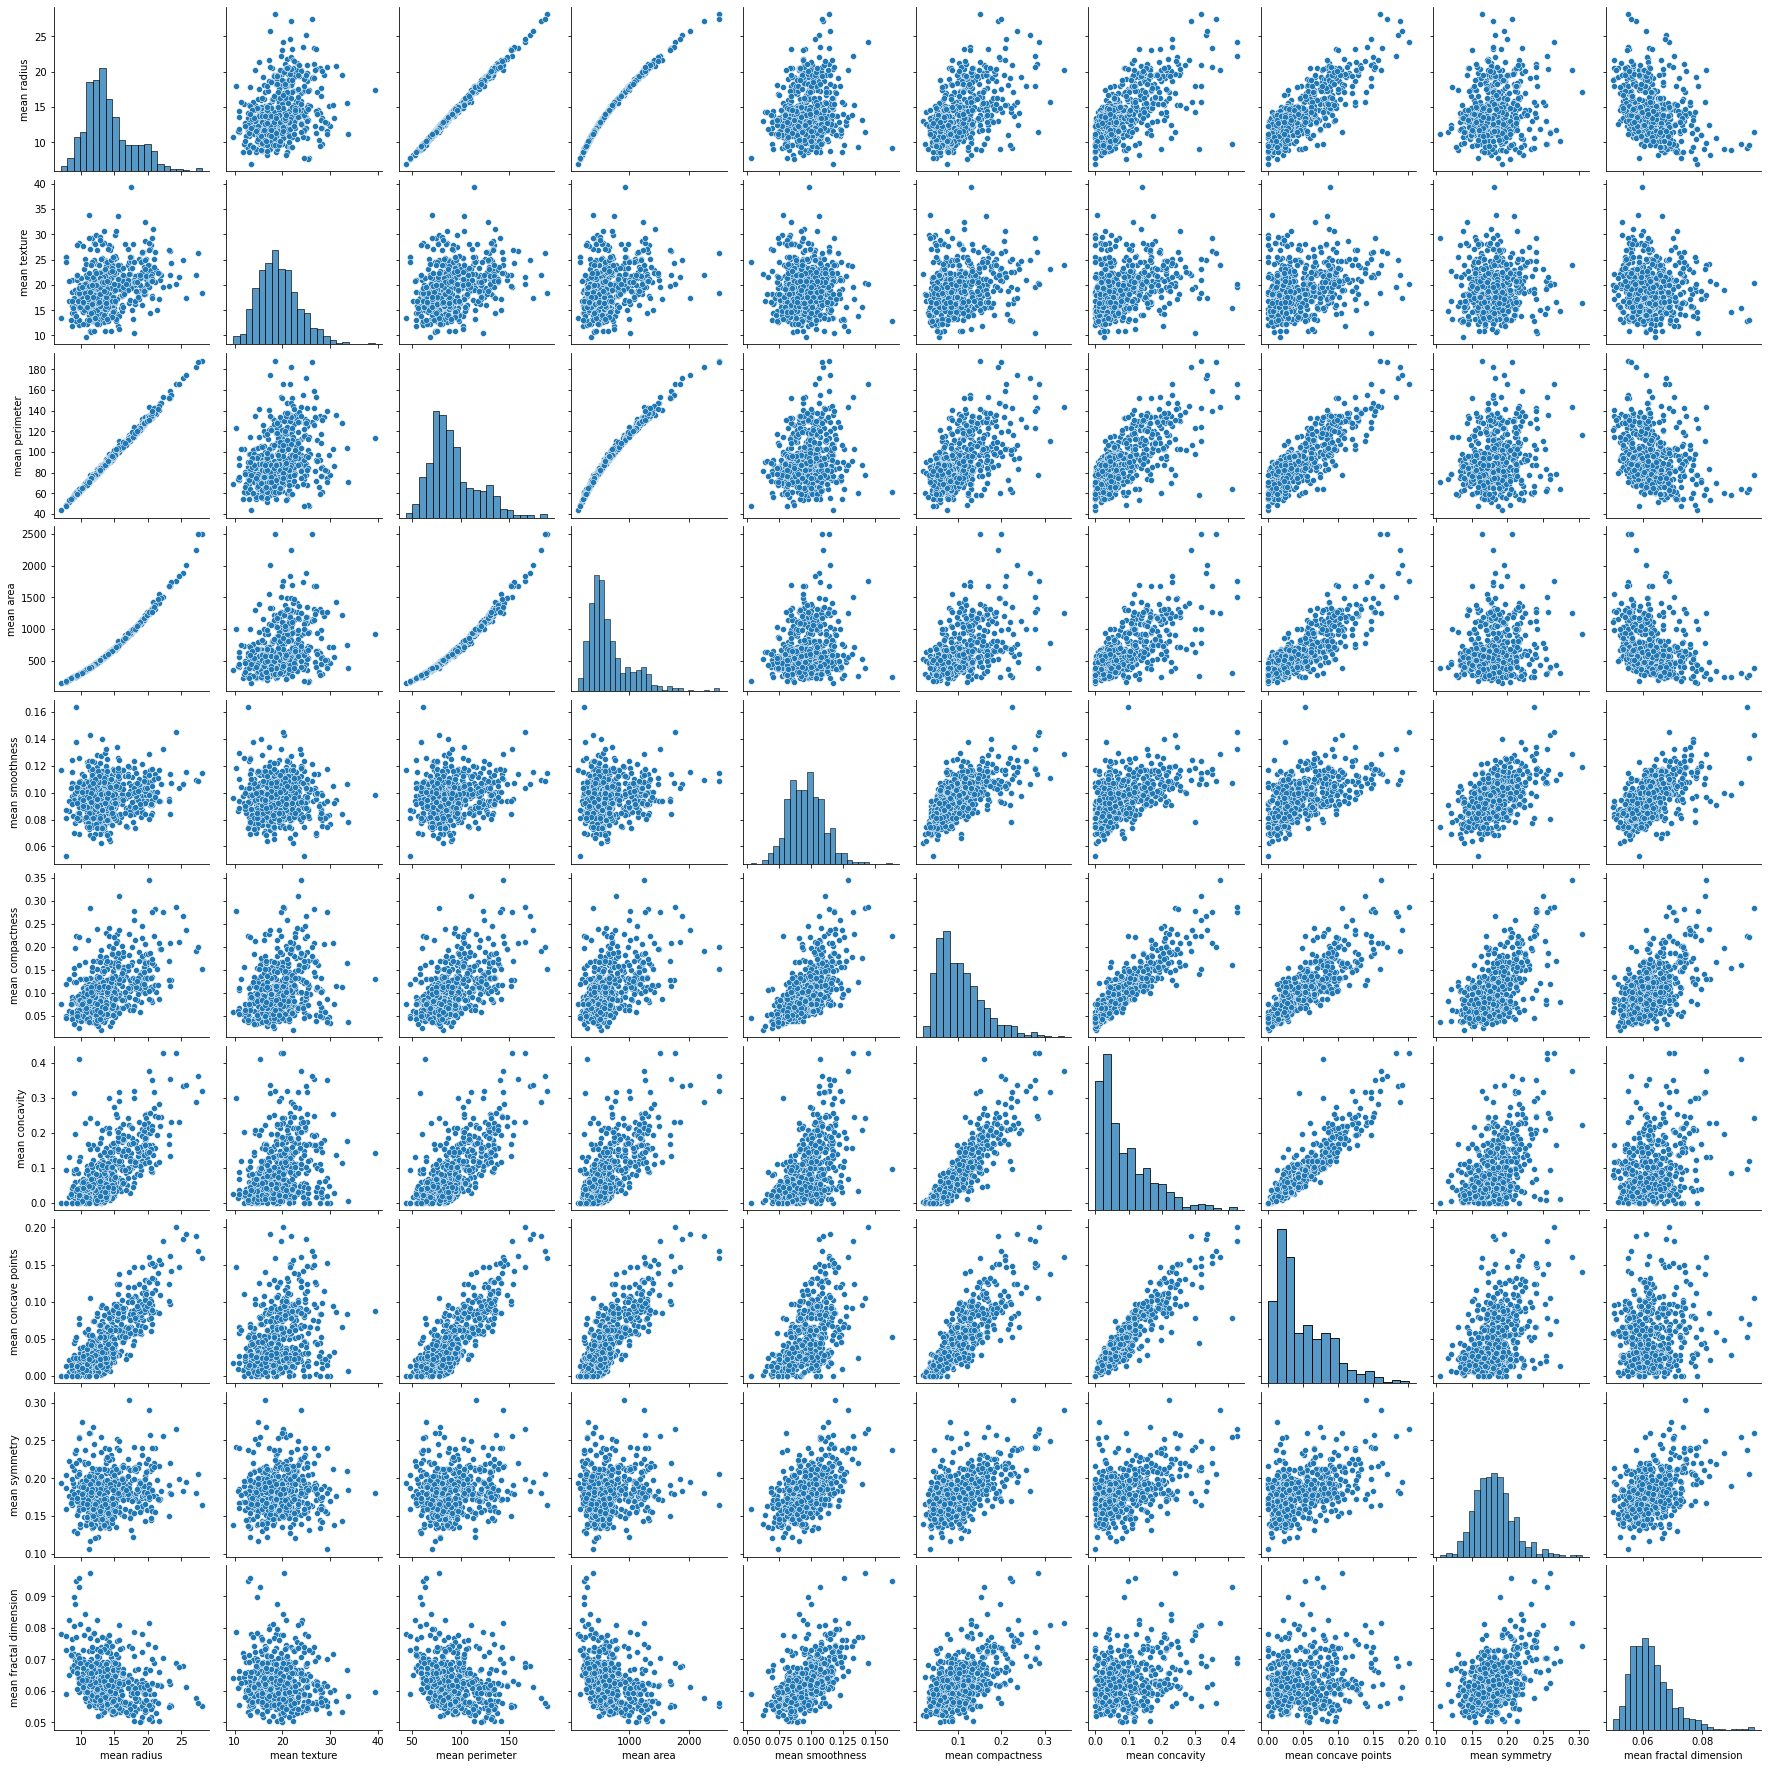

In [997]:
# Generar graficos de relaciones por pares de atributos
sns.pairplot(bcw.iloc[:,0:11])
plt.show()

<font color=#0565A5>Adicionalmente, se pueden observar estas correlaciones de forma sencilla a través de un **mapa de calor**, que consume menos recursos computacionalmente.

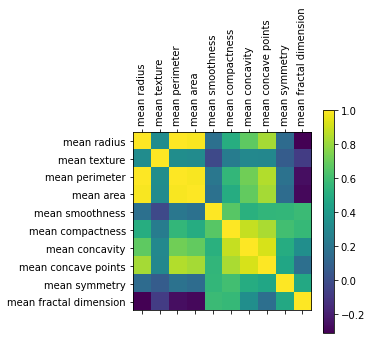

In [1001]:
# Generar mapa de calor a partir de la matriz de correlación
plt.matshow(bcw.iloc[:,0:11].corr())
plt.xticks(range(bcw.iloc[:,0:11].select_dtypes(['number']).shape[1]), bcw.iloc[:,0:11].select_dtypes(['number']).columns, rotation=90)
plt.yticks(range(bcw.iloc[:,0:11].select_dtypes(['number']).shape[1]), bcw.iloc[:,0:11].select_dtypes(['number']).columns)
plt.colorbar()
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> determinad cuáles son las variables con una correlación superior al 90% y cread un nuevo conjunto de datos (dataframe) eliminando estas variables.
</div>

In [1077]:
# Craer dataframe con la misma estructura que la matriz de correlación
# pero registrando True si la correlación entre pares es mayor que 0.9 y menor que 1, y False en otro caso.
corr = bcw.corr()
high_corr = corr
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (corr.iloc[i,j] > .9) & (corr.iloc[i,j] < 1):
            high_corr.iloc[i,j] = True
        else: high_corr.iloc[i,j] = False
high_corr

mean radius mean texture mean perimeter mean area  \
mean radius                   False        False           True      True   
mean texture                  False        False          False     False   
mean perimeter                 True        False          False      True   
mean area                      True        False           True     False   
mean smoothness               False        False          False     False   
mean compactness              False        False          False     False   
mean concavity                False        False          False     False   
mean concave points           False        False          False     False   
mean symmetry                 False        False          False     False   
mean fractal dimension        False        False          False     False   
radius error                  False        False          False     False   
texture error                 False        False          False     False   
perimeter error               False        False          False     False   
area error                    False        False          False     False   
smoothness error              False        False          False     False   
compactness error             False        False          False     False   
concavity error               False        False          False     False   
concave points error          False        False          False     False   
symmetry error                False        False          False     False   
fractal dimension error       False        False          False     False   
worst radius                   True        False           True      True   
worst texture                 False         True          False     False   
worst perimeter                True        False           True      True   
worst area                     True        False           True      True   
worst smoothness              False        False          False     False   
worst compactness             False        False          False     False   
worst concavity               False        False          False     False   
worst concave points          False        False          False     False   
worst symmetry                False        False          False     False   
worst fractal dimension       False        False          False     False   

                        mean smoothness mean compactness mean concavity  \
mean radius                       False            False          False   
mean texture                      False            False          False   
mean perimeter                    False            False          False   
mean area                         False            False          False   
mean smoothness                   False            False          False   
mean compactness                  False            False          False   
mean concavity                    False            False          False   
mean concave points               False            False           True   
mean symmetry                     False            False          False   
mean fractal dimension            False            False          False   
radius error                      False            False          False   
texture error                     False            False          False   
perimeter error                   False            False          False   
area error                        False            False          False   
smoothness error                  False            False          False   
compactness error                 False            False          False   
concavity error                   False            False          False   
concave points error              False            False          False   
symmetry error                    False            False          False   
fractal dimension error           False            False          False   
worst radius                      False            False     

In [1095]:
# Eliminar las columnas del dataframe original que no tengan al menos un True entre todas las filas del dataframe high_corr
bcw_low_corr = bcw.drop(["diagnosis"], 1)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if high_corr.iloc[j,i]:
            bcw_low_corr = bcw_low_corr.drop([bcw.columns[i+1]], 1)
            print("Se ha eliminado la columna \033[1m" + bcw.columns[i+1] + "\033[0m")
            break
bcw_low_corr

Se ha eliminado la columna mean radius
Se ha eliminado la columna mean texture
Se ha eliminado la columna mean perimeter
Se ha eliminado la columna mean area
Se ha eliminado la columna mean concavity
Se ha eliminado la columna mean concave points
Se ha eliminado la columna radius error
Se ha eliminado la columna perimeter error
Se ha eliminado la columna area error
Se ha eliminado la columna worst radius
Se ha eliminado la columna worst texture
Se ha eliminado la columna worst perimeter
Se ha eliminado la columna worst area
Se ha eliminado la columna worst concave points


mean smoothness  mean compactness  mean symmetry  mean fractal dimension  \
0            0.11840           0.27760         0.2419                 0.07871   
1            0.08474           0.07864         0.1812                 0.05667   
2            0.10960           0.15990         0.2069                 0.05999   
3            0.14250           0.28390         0.2597                 0.09744   
4            0.10030           0.13280         0.1809                 0.05883   
..               ...               ...            ...                     ...   
564          0.11100           0.11590         0.1726                 0.05623   
565          0.09780           0.10340         0.1752                 0.05533   
566          0.08455           0.10230         0.1590                 0.05648   
567          0.11780           0.27700         0.2397                 0.07016   
568          0.05263           0.04362         0.1587                 0.05884   

     texture error  smoothness error  compactness error  concavity error  \
0           0.9053          0.006399            0.04904          0.05373   
1           0.7339          0.005225            0.01308          0.01860   
2           0.7869          0.006150            0.04006          0.03832   
3           1.1560          0.009110            0.07458          0.05661   
4           0.7813          0.011490            0.02461          0.05688   
..             ...               ...                ...              ...   
564         1.2560          0.010300            0.02891          0.05198   
565         2.4630          0.005769            0.02423          0.03950   
566         1.0750          0.005903            0.03731          0.04730   
567         1.5950          0.006522            0.06158          0.07117   
568         1.4280          0.007189            0.00466          0.00000   

     concave points error  symmetry error  fractal dimension error  \
0                 0.01587         0.03003                 0.006193   
1                 0.01340         0.01389                 0.003532   
2                 0.02058         0.02250                 0.004571   
3                 0.01867         0.05963                 0.009208   
4                 0.01885         0.01756                 0.005115   
..                    ...             ...                      ...   
564               0.02454         0.01114                 0.004239   
565               0.01678         0.01898                 0.002498   
566               0.01557         0.01318                 0.003892   
567               0.01664         0.02324                 0.006185   
568               0.00000         0.02676                 0.002783   

     worst smoothness  worst compactness  worst concavity  worst symmetry  \
0             0.16220            0.66560           0.7119          0.4601   
1             0.12380            0.18660           0.2416          0.2750   
2             0.14440            0.42450           0.4504          0.3613   
3             0.20980            0.86630           0.6869          0.6638   
4             0.13740            0.20500           0.4000          0.2364   
..                ...                ...              ...             ...   
564           0.14100            0.21130           0.4107          0.2060   
565           0.11660            0.19220           0.3215          0.2572   
566           0.11390            0.30940           0.3403          0.2218   
567           0.16500            0.86810           0.9387          0.4087   
568           0.08996            0.06444           0.0000          0.2871   

     worst fractal dimension  
0                    0.11890  
1                    0.08902  
2                    0.08758  
3                    0.17300  
4                    0.07678  
..                       ...  
564                  0.07115  
565                  0.06637  
566                  0.07820  
567                  0.12400  
568         

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> mirando las correlaciones, ¿qué variables son las que tienen una correlación más fuerte y han sido eliminadas? ¿Qué efecto puede tener en el resultado final el hecho de elminarlas o no?
</div>

<font color=#0565A5>Las variables eliminadas han sido las **14** impresas en **negrita** en el output anterior. Al eliminar estas variables, el conjunto de datos ha perdido gran parte de su información intríseca relativa a la distinción entre un diagnóstico y otro, ya que eran estas variables eliminadas las que aportaban dicha información.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Bonus:</strong>
<br> - ¿Qué test estadístico podrías usar para comparar las distribuciones de los valores de los atributos cuando los diagnósticos son benignos o malignos? Úsalo para evaluar qué atributos (de entre todos los del conjunto de datos) tienen valores más parecidos en tumores benignos y malignos. Interpreta el resultado.
    </div>

<font color=#0565A5>El test de **Kolmogorov–Smirnov** consiste en medir la distancia entre distribuciones teniendo en cuento la media y la dispersión de los datos, por lo que podría resultar de gran utilidad en este caso. Para ello, calcula la función acumulada de cada distribución y mide su distancia vertical, logrando así evaluar la diferencia tanto de las medidas de centro como de dispersión de las distribuciones. Tras realizar el contraste de hipótesis, la función en Python devuelve el valor *static* y el *p-value*. Cuanto menor sea este último, más diferentes serán las distribuciones comparadas; y al revés con el valor *static*.

In [2123]:
# Importar el test de Kolmogorov-Smirnov
from scipy.stats import ks_2samp

# Eliminar la columna diagnosis
bcw_ft = bcw.drop(["diagnosis"], 1)

# Crear DF vacío para registrar los resultados
res = pd.DataFrame()

# Divididir cada atributo entre el nº de clases para evaluar las variables disociadas.
for i in range(bcw_ft.shape[1]):
    res[bcw_ft.columns[i]] = ks_2samp(bcw_ft.loc[bcw["diagnosis"]=="B"].iloc[i], bcw_ft.loc[bcw["diagnosis"]=="M"].iloc[i])

# Renombrar las filas para indicar el valor que representan
res = res.rename(index={0:"Static", 1:"p-value"})
res

mean radius  mean texture  mean perimeter  mean area  \
Static      0.200000      0.133333        0.200000   0.333333   
p-value     0.594071      0.957846        0.594071   0.070888   

         mean smoothness  mean compactness  mean concavity  \
Static          0.200000          0.166667        0.100000   
p-value         0.594071          0.807963        0.998839   

         mean concave points  mean symmetry  mean fractal dimension  \
Static              0.233333       0.233333                0.266667   
p-value             0.392945       0.392945                0.239073   

         radius error  texture error  perimeter error  area error  \
Static       0.100000       0.233333         0.233333    0.200000   
p-value      0.998839       0.392945         0.392945    0.594071   

         smoothness error  compactness error  concavity error  \
Static           0.200000           0.200000         0.100000   
p-value          0.594071           0.594071         0.998839   

         concave points error  symmetry error  fractal dimension error  \
Static               0.233333        0.133333                 0.233333   
p-value              0.392945        0.957846                 0.392945   

         worst radius  worst texture  worst perimeter  worst area  \
Static       0.200000       0.166667         0.200000    0.166667   
p-value      0.594071       0.807963         0.594071    0.807963   

         worst smoothness  worst compactness  worst concavity  \
Static           0.100000           0.100000         0.133333   
p-value          0.998839           0.998839         0.957846   

         worst concave points  worst symmetry  worst fractal dimension  
Static               0.166667        0.133333                 0.233333  
p-value              0.807963        0.957846                 0.392945

<font color=#0565A5>De esta forma podemos observar las variables con mayor valor ***static*** y menor ***p-value***, que serán las que mejor separen la clase. Por ejemplo, ***mean area*** y ***mean fractal dimension*** presentan una mayor diferencia entre sus distribuciones disaciadas por clase.

# 3. Reducción de dimensionalidad (3 puntos)

En este ejercicio deberéis aplicar métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el conjunto de atributos a un nuevo conjunto con menos dimensiones.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> aplicad el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones:
<br>- El conjunto de datos original
<br>- El conjunto de datos al cual se le han extraído las variables fuertemente correlacionadas

NOTA: Tened cuidado y no incluyáis la variable objetivo "Diagnosis" a la reducción de dimensionalidad. Queremos poder explicar la variable objetivo en funcion del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: no es necesario que programéis los algoritmos, podéis hacer uso de las implementaciones disponibles en la librería "scikit-learn".
</div>

In [1281]:
# Crear dataframe sin la columna "diagnosis" para utilizar solo las variables
bcw_ft = bcw.drop(["diagnosis"], 1)

# Normalizar ambos datasets (max-min)
bcw_ft_n = (bcw_ft - bcw_ft.min()) / (bcw_ft.max() - bcw_ft.min())
bcw_low_corr_n = (bcw_low_corr - bcw_low_corr.min()) / (bcw_low_corr.max() - bcw_low_corr.min())

In [1282]:
# Instanciar PCA con n_components = 2 para obtener las dos dimensiones que más varianza aportan
pca = PCA(n_components=2)

Filas y dimensiones finales:	 (569, 2) 
Suma de la varianza:		 0.7038117901347681 
Puntuación:			 29.41181779472275 


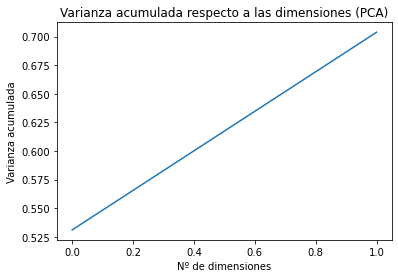

In [1296]:
# Ajustar el modelo a los datos con todas la variables
pca.fit(bcw_ft_n)
bcw_ft_pca = pca.transform(bcw_ft_n)

print("Filas y dimensiones finales:\t\033[1m", bcw_ft_pca.shape, "\033[0m")
expl = pca.explained_variance_ratio_
print("Suma de la varianza:\t\t\033[1m", sum(expl), "\033[0m")
print("Puntuación:\t\t\t\033[1m", pca.score(bcw_ft_n, bcw["diagnosis"]), "\033[0m")

#Visualizar el grafico de la varianza acumulada
plt.title('Varianza acumulada respecto a las dimensiones (PCA)')
plt.xlabel('Nº de dimensiones')
plt.ylabel('Varianza acumulada')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

Filas y dimensiones finales:	 (569, 2) 
Suma de la varianza:		 0.6432834866082104 
Puntuación:			 14.79440111310216 


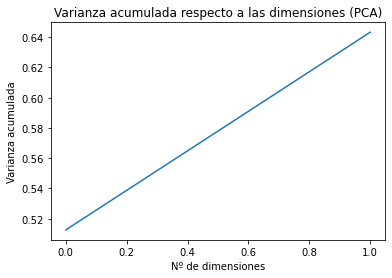

In [1285]:
# Ajustar el modelo a los datos sin las variables fuertemente correlacionadas
pca.fit(bcw_low_corr_n)
bcw_low_corr_pca = pca.transform(bcw_low_corr_n)

print("Filas y dimensiones finales:\t\033[1m", bcw_low_corr_pca.shape, "\033[0m")
expl = pca.explained_variance_ratio_
print("Suma de la varianza:\t\t\033[1m", sum(expl), "\033[0m")
print("Puntuación:\t\t\t\033[1m", pca.score(bcw_low_corr_n, bcw["diagnosis"]), "\033[0m")

#Visualizar el grafico de la varianza acumulada
plt.title('Varianza acumulada respecto a las dimensiones (PCA)')
plt.xlabel('Nº de dimensiones')
plt.ylabel('Varianza acumulada')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

<font color=#0565A5>Podemos apreciar la diferencia de varianza acumulada entre las dos dimensiones resultantes dependiendo del dataset utilizado. El que cuenta con todas las variables tiene una varianza acumulada de **0.7**, mientras que el dataset al que se le ha extraído las dimensiones más correlacionadas tienen una varianza acumulada de **0.64** con dos variables.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> generad un gráfico (en 2D) con el resultado del PCA usando colores diferentes para cada clase de la respuesta, con el objetivo de visualizar si es posible separar eficientemente las clases empleando este método.</div>

In [1286]:
# Guardar los resultados como DataFrame
bcw_pca = pd.DataFrame(data=bcw_ft_pca)
bcw_low_pca = pd.DataFrame(data=bcw_low_corr_pca)

### <font color=#0565A5>Dataset original

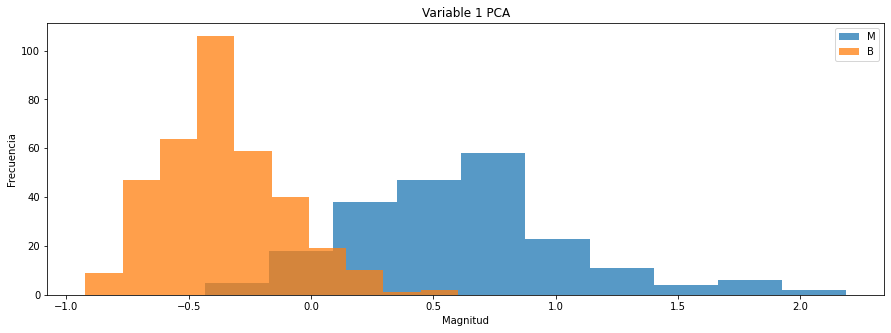

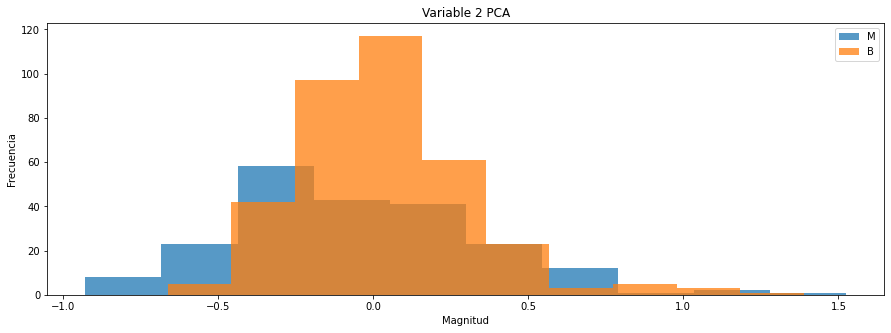

In [1287]:
# Crear 2 gráficos, 1 por cada variable
for i in range(bcw_pca.shape[1]):
    plt.figure(figsize=(15,5))
    plt.title("Variable {} PCA".format(i+1))
    # Cada gráfico debe dividir los registros según los valores de la clase (diagnosis) y mostrarlos de forma separada
    for j in bcw["diagnosis"].unique():
        plt.hist(bcw_pca[i].loc[bcw["diagnosis"]==j], alpha=.75)
    plt.legend(bcw["diagnosis"].unique())
    plt.xlabel("Magnitud")
    plt.ylabel("Frecuencia")
    plt.show()

### <font color=#0565A5>Dataset sin las variables más correlacionadas

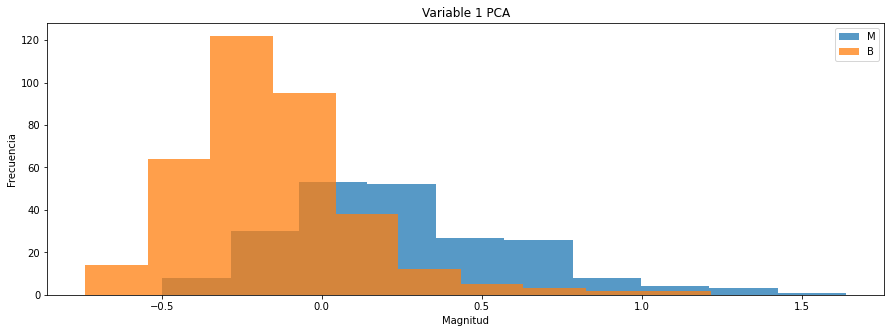

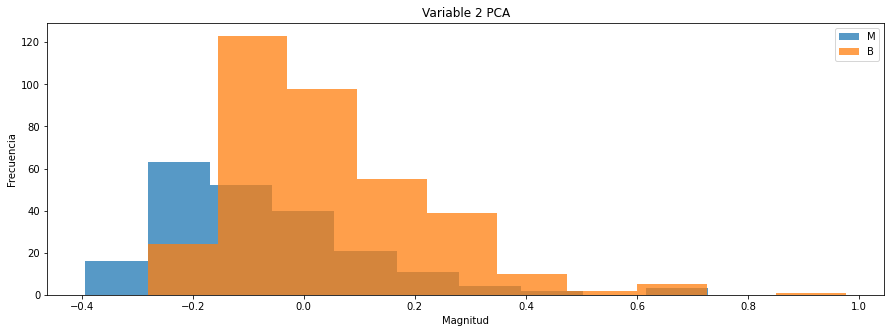

In [1288]:
# Crear 2 gráficos, 1 por cada variable
for i in range(bcw_low_pca.shape[1]):
    plt.figure(figsize=(15,5))
    plt.title("Variable {} PCA".format(i+1))
    # Cada gráfico debe dividir los registros según los valores de la clase (diagnosis) y mostrarlos de forma separada
    for j in bcw["diagnosis"].unique():
        plt.hist(bcw_low_pca[i].loc[bcw["diagnosis"]==j], alpha=.75)
    plt.legend(bcw["diagnosis"].unique())
    plt.xlabel("Magnitud")
    plt.ylabel("Frecuencia")
    plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comenta el resultado.</div>

<font color=#0565A5>En la ***variable 1 PCA*** del *dataset original* se aprecia una muy buena diferenciación entre los registros con diagnóstico benigno y maligno, mientras que en la ***variable 2 PCA*** es más dificil hacer esta distinción. No obstante, los registros de clase benigno tienen claramente una mayor concentración en el centro de la distribución.
    
<font color=#0565A5>En cuanto al *dataset al que se la han extraído previamente los atributos más correlacionados*, la diferenciación entre clases no es tan evidente. En la ***variable 1 PCA*** hay una mayor superposición que en la misma variable del dataset original, lo que hace que sea más dificil discernir entre la clase. Aún así, se puede ver que los registros con diagnóstico benigno se acumulan mayormente a la izquierda de la distribución, mientras que los de diagnóstico maligno se acumulan más en el centro de forma más aplanada (mayor desviación estándar). La ***variable 2 PCA*** se asemeja mucho a la misma variable 2 PCA del dataset original, con ambas distribuciones algo más a la izquierda.
    
<font color=#0565A5>**La diferencia entre ambos datasets se hace especialmente notable en la variable 1 PCA, siendo la del dataset original mucho más concluyente.**

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> ¿qué otro método o métodos de reducción de dimensionalidad se podrían aplicar?</div>

<font color=#0565A5>Existen varios métodos de reducción de dimensionalidad tanto lineales (**LDA**) como no lineales (**GDA**).
    
<font color=#0565A5>**LDA** (Linear Discriminant Analysis) hace una representación de los datos de forma que optimiza la posible clasificación de los datos, tratando de maximizar la distancia entre los datos de distintas clases y minimizando la de los datos de la misma clase.
    
<font color=#0565A5>**GDA** (Generalized Discriminant Analysis) se utiliza para conjuntos de datos multiclase. Funciona de forma que primero crea un espacio dimensional mayor que el original para tratar de crear nuevas "perspectivas" desde las que, posteriormente, LDA pueda realizar separaciones más claras entre los datos pertenecientes a distintas clases.
    
<font color=#0565A5>Como conclusión, **LDA** es más conveniente en este caso dado que tan solo disponemos de una clase ("*diagnosis*"), por lo que con GDA estaríamos complicando la reducción de dimensionalidad innecesariamente.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> elige un método de reducción y genera el gráfico (2D) con el resultado.</div>

In [1289]:
# Importar librería e instanciar LDA con n_components=1
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
# LDA solo trabaja con un n_componentes <= nº de clases - 1; en este caso, n_componentes < (2-1)

In [1191]:
target

target
0        M
1        M
2        M
3        M
4        M
..     ...
564      M
565      M
566      M
567      M
568      B

[569 rows x 1 columns]

In [1197]:
bcw["diagnosis"]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: category
Categories (2, object): ['B', 'M']

In [1224]:
lda.explained_variance_ratio_

array([1.])

In [1290]:
# Ajustar el modelo a los datos con todas la variables
lda.fit(bcw_ft_n, bcw["diagnosis"])
bcw_ft_lda = lda.transform(bcw_ft_n)

print("Filas y dimensiones finales:\t\033[1m", bcw_ft_lda.shape, "\033[0m")
print("Puntuación:\t\t\t\033[1m", lda.score(bcw_ft_n, bcw["diagnosis"]), "\033[0m")

Filas y dimensiones finales:	 (569, 1) 
Puntuación:			 0.9648506151142355 


In [1291]:
# Ajustar el modelo a los datos sin las variables fuertemente correlacionadas
lda.fit(bcw_low_corr_n, bcw["diagnosis"])
bcw_low_corr_lda = lda.transform(bcw_low_corr_n)

print("Filas y dimensiones finales:\t\033[1m", bcw_low_corr_lda.shape, "\033[0m")
print("Puntuación:\t\t\t\033[1m", lda.score(bcw_low_corr_n, bcw["diagnosis"]), "\033[0m")

Filas y dimensiones finales:	 (569, 1) 
Puntuación:			 0.9437609841827768 


In [1292]:
# Guardar los resultados como DataFrame
bcw_lda = pd.DataFrame(data=bcw_ft_lda)
bcw_low_lda = pd.DataFrame(data=bcw_low_corr_lda)

### <font color=#0565A5>Dataset original

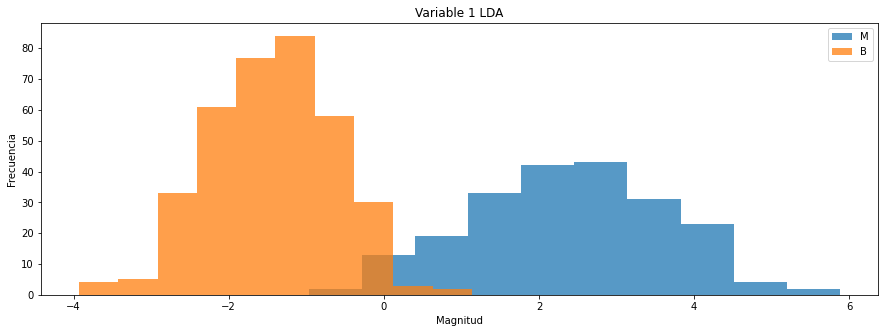

In [1293]:
# Crear el gráfico con el resultado del LDA
for i in range(bcw_lda.shape[1]):
    plt.figure(figsize=(15,5))
    plt.title("Variable {} LDA".format(i+1))
    # Cada gráfico debe dividir los registros según los valores de la clase (diagnosis) y mostrarlos de forma separada
    for j in bcw["diagnosis"].unique():
        plt.hist(bcw_lda[i].loc[bcw["diagnosis"]==j], alpha=.75)
    plt.legend(bcw["diagnosis"].unique())
    plt.xlabel("Magnitud")
    plt.ylabel("Frecuencia")
    plt.show()

### <font color=#0565A5>Dataset sin las variables más correlacionadas

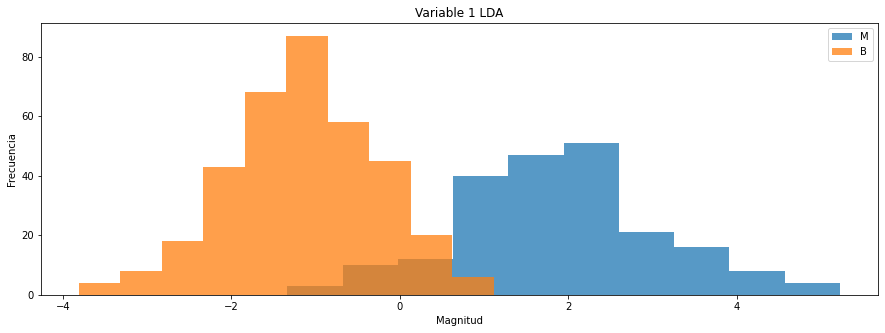

In [1294]:
# Crear el gráfico con el resultado del LDA
for i in range(bcw_low_lda.shape[1]):
    plt.figure(figsize=(15,5))
    plt.title("Variable {} LDA".format(i+1))
    # Cada gráfico debe dividir los registros según los valores de la clase (diagnosis) y mostrarlos de forma separada
    for j in bcw["diagnosis"].unique():
        plt.hist(bcw_low_lda[i].loc[bcw["diagnosis"]==j], alpha=.75)
    plt.legend(bcw["diagnosis"].unique())
    plt.xlabel("Magnitud")
    plt.ylabel("Frecuencia")
    plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> en comparación con el PCA, ¿qué método ha resultado más efectivo para visualizar las dos clases de diagnóstico de forma separada? ¿Cuándo es más apropriado usar PCA o el otro método elegido?</div>

<font color=#0565A5>En el *dataset original*, la ***variable 1 LDA*** es bastante similar a la ***variable 1 PCA***, teniendo la primera una mejor separación de la clase.
    
<font color=#0565A5>Sin embargo, en el *dataset sin atributos fuertemente correlacionados* la diferencia es mucho mayor. La ***variable 1 LDA*** es capaz de separar extraordinariamente bien los registros de distinta clase, mientras que la ***variable 1 PCA*** no consigue lograr ese nivel de separación.

<font color=#0565A5>Como hemos podido ver, cuando no contamos con variables que estén muy correlacionadas en el dataset, el **LDA** funciona extraordinariamente bien. **PCA** también da buenos resultados en este caso, pero cuando la correlación entre las variables es más baja, este método no da tan buenos resultados. Por lo tanto, será más conveniente aplicar el **LDA** en datasets cuyas variables presenten baja correlación entre ellas y contemos con una sola clase. Por otro lado, **PCA** es muy potente para datasets con una gran número de dimensiones, pero está algo más limitado que **LDA** cuando la correlación entre los atributos es baja.

In [1264]:
lda.score(bcw_low_corr_n, bcw["diagnosis"])

0.9437609841827768

# 4. Entrenamiento y test (3 puntos)

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el clasificador Decision Tree (un árbol de decisión), para predecir el diagnóstico de cáncer de mama (tumor benigno o maligno) y evaluar la precisión obtenida con el modelo. Para ello usaremos:
- El conjunto de datos original con todos los atributos
- El conjunto de datos reducido a sólo 2 atributos con PCA
- El conjunto de datos sin las variables fuertemente correlacionada y reducido a sólo 2 atributos con el método PCA

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> usando el conjunto de datos original:

 - Dividid el dataset en train y test.
 - Definid un modelo Decision Tree (fijando max_depth = 5 para mantener el modelo simple).
 - Aplicad validación cruzada con el modelo definido y el dataset de train (con cv=5 ya es suficiente).
 - Calculad la media y la desviación estándar de la validación cruzada.
    
<hr>
Sugerencia: Para separar entre train y test podéis usar train_test_split de sklearn.

Sugerencia: Para entrenar un modelo decision tree podéis usar 'DecisionTreeClassifier' de sklearn.

Sugerencia: Para aplicar validación cruzada podéis usar 'cross_val_score' de sklearn.
</div>

In [1857]:
# Dividir dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(bcw.drop(["diagnosis"], 1), bcw["diagnosis"], test_size=0.25)

In [1858]:
# Generar modelo
dt1 = DecisionTreeClassifier(max_depth=5)

# Validación cruzada
vc = cross_val_score(dt1, X_train, y_train, cv=5)

# Media y desviación estándar
print("Media:\t\t\t\033[1m", vc.mean(), "\033[0m")
print("Desviación estándar:\t\033[1m", vc.std(), "\033[0m")

Media:			 0.9341997264021888 
Desviación estándar:	 0.029473990104478886 


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> haced el fit con todo el conjunto de train, y generad el árbol de decisión correspondiente.
    
<hr>
Sugerencia: para dibujar árboles de decisión, echad un ojo a este link:

https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

</div>

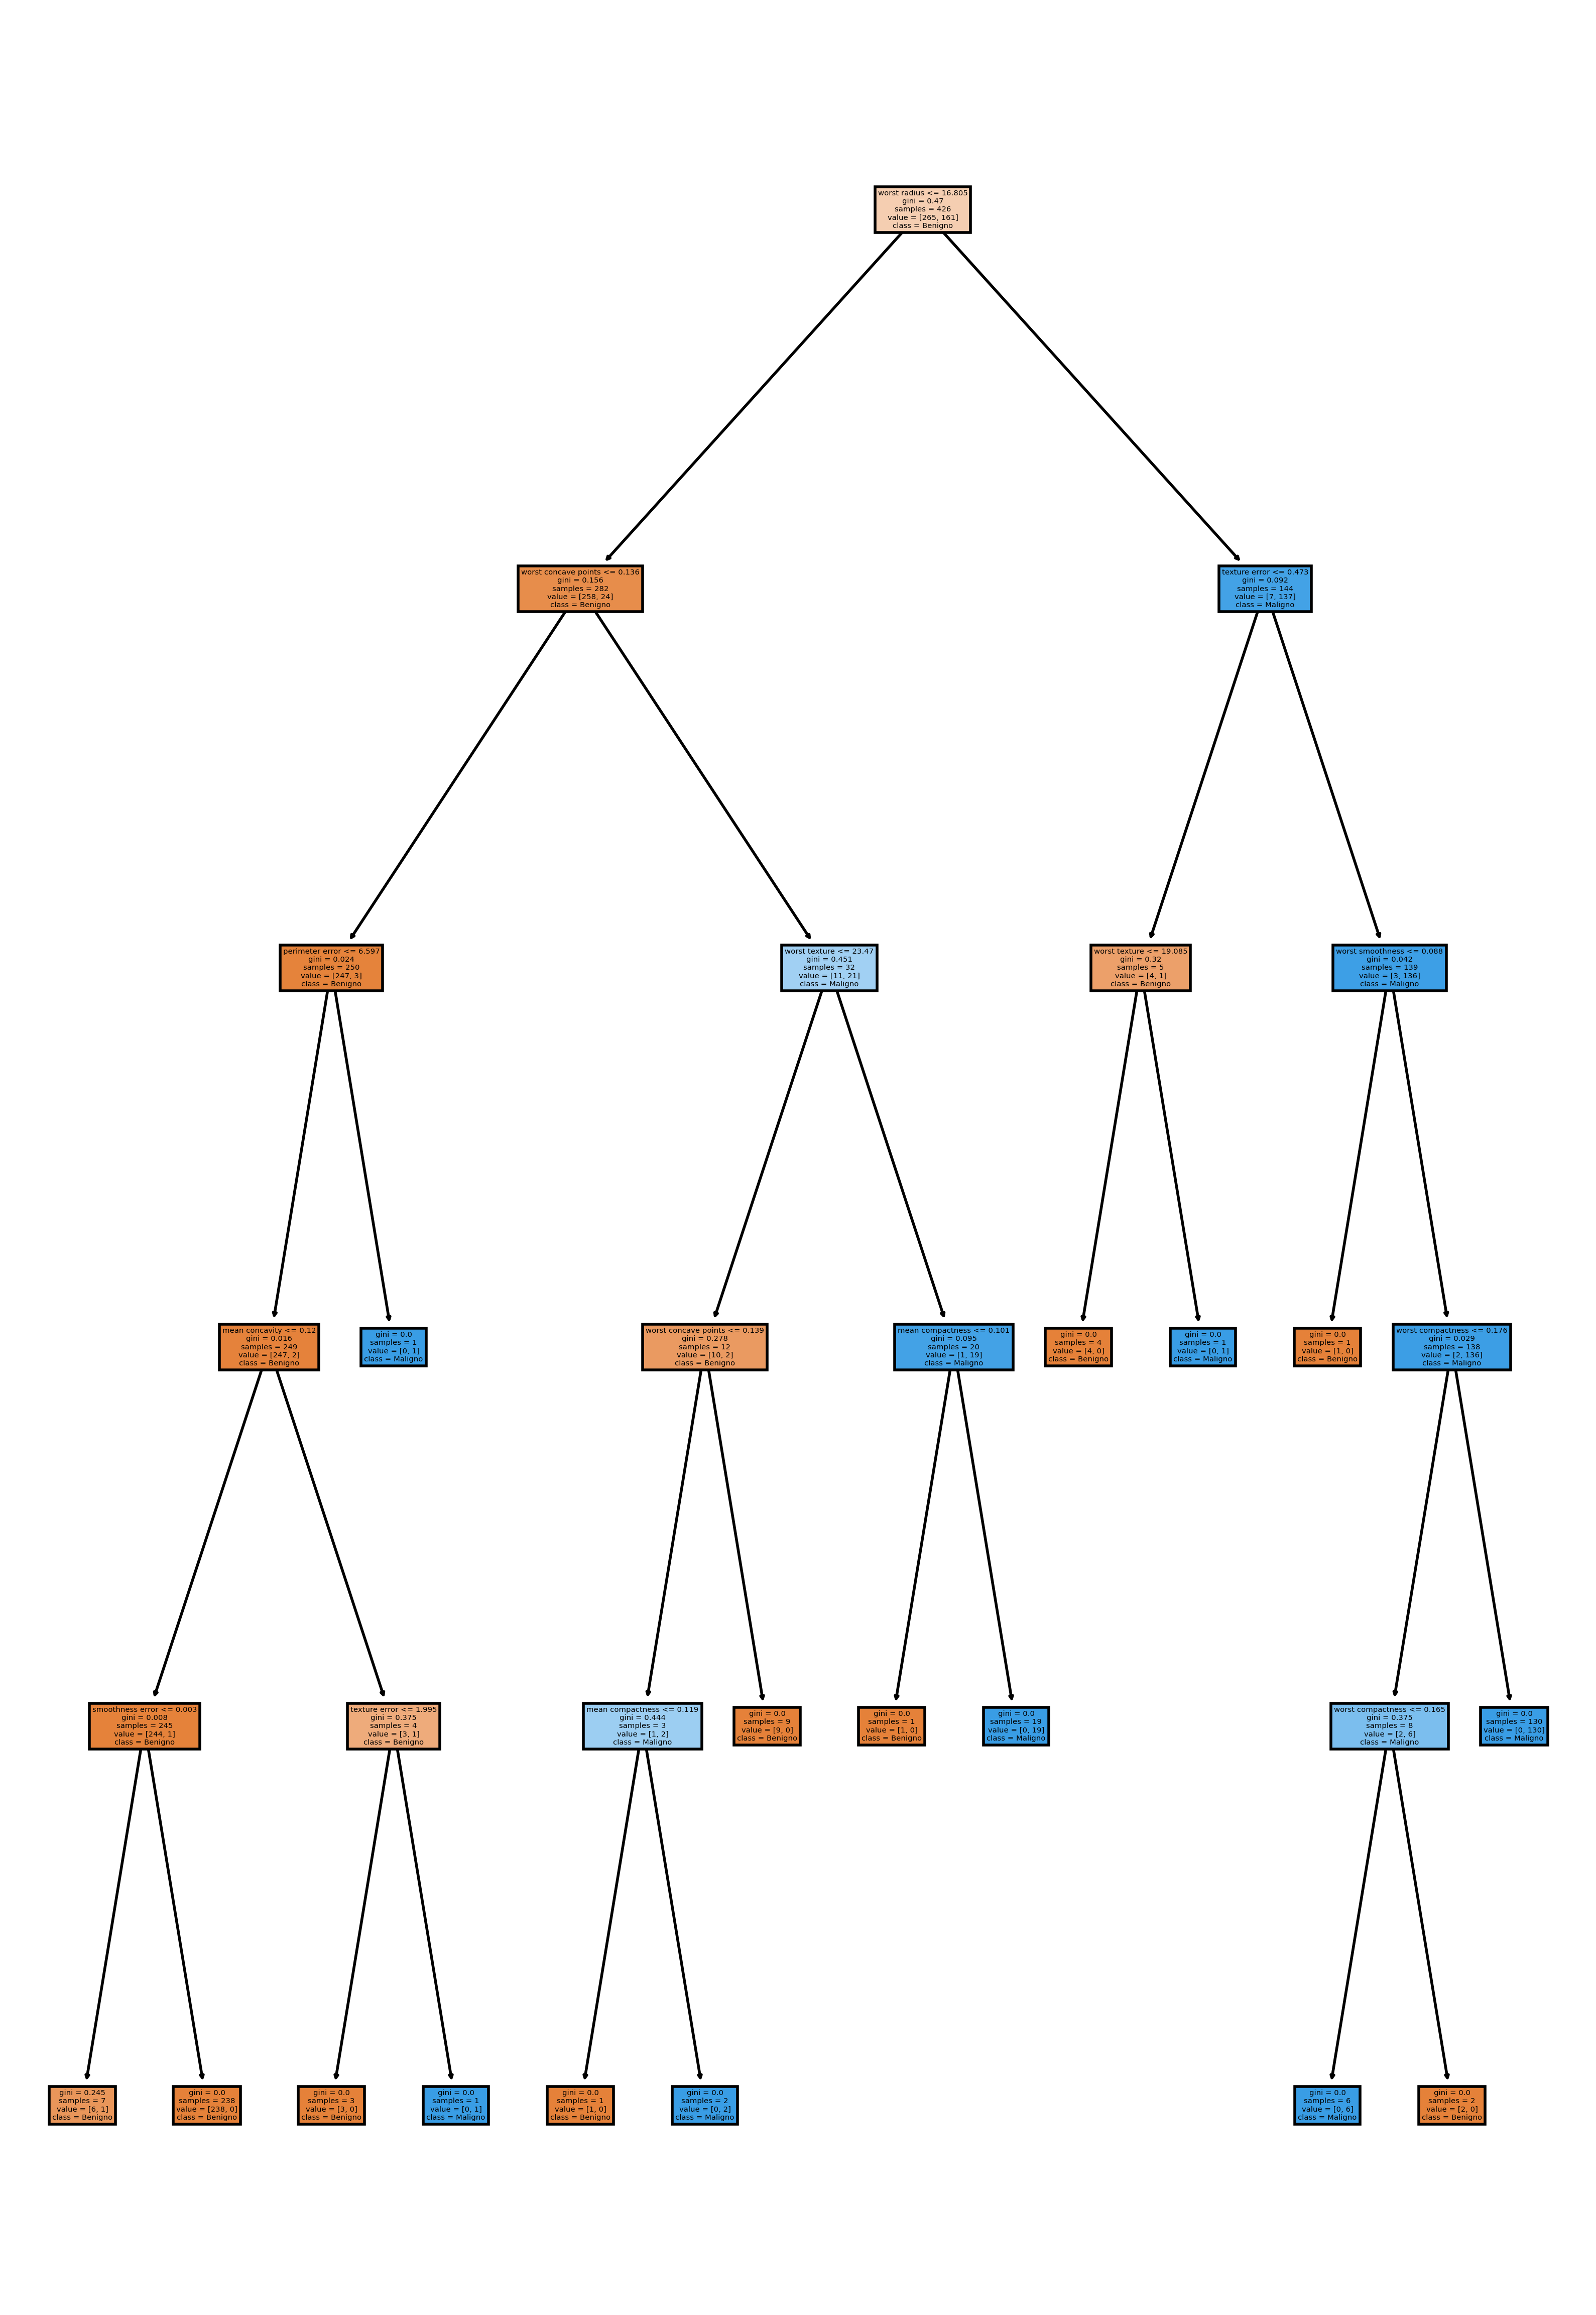

In [1859]:
# Hacer fit con el conjunto de train
dt1.fit(X_train, y_train)

# Representar gráficamente
plt.subplots(nrows = 1,ncols = 1,figsize = (10, 15), dpi=400)
plot_tree(dt1, feature_names = X_train.columns, class_names = ["Benigno", "Maligno"], filled = True);

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> repetid el mismo procedimiento que en el ejercicio anterior con el dataset reducido a 2 dimensiones con PCA.
</div>

In [1845]:
# Dividir dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(bcw_pca, bcw["diagnosis"], test_size=0.25)

Media:			 0.9295485636114911 
Desviación estándar:	 0.010678028710391672 


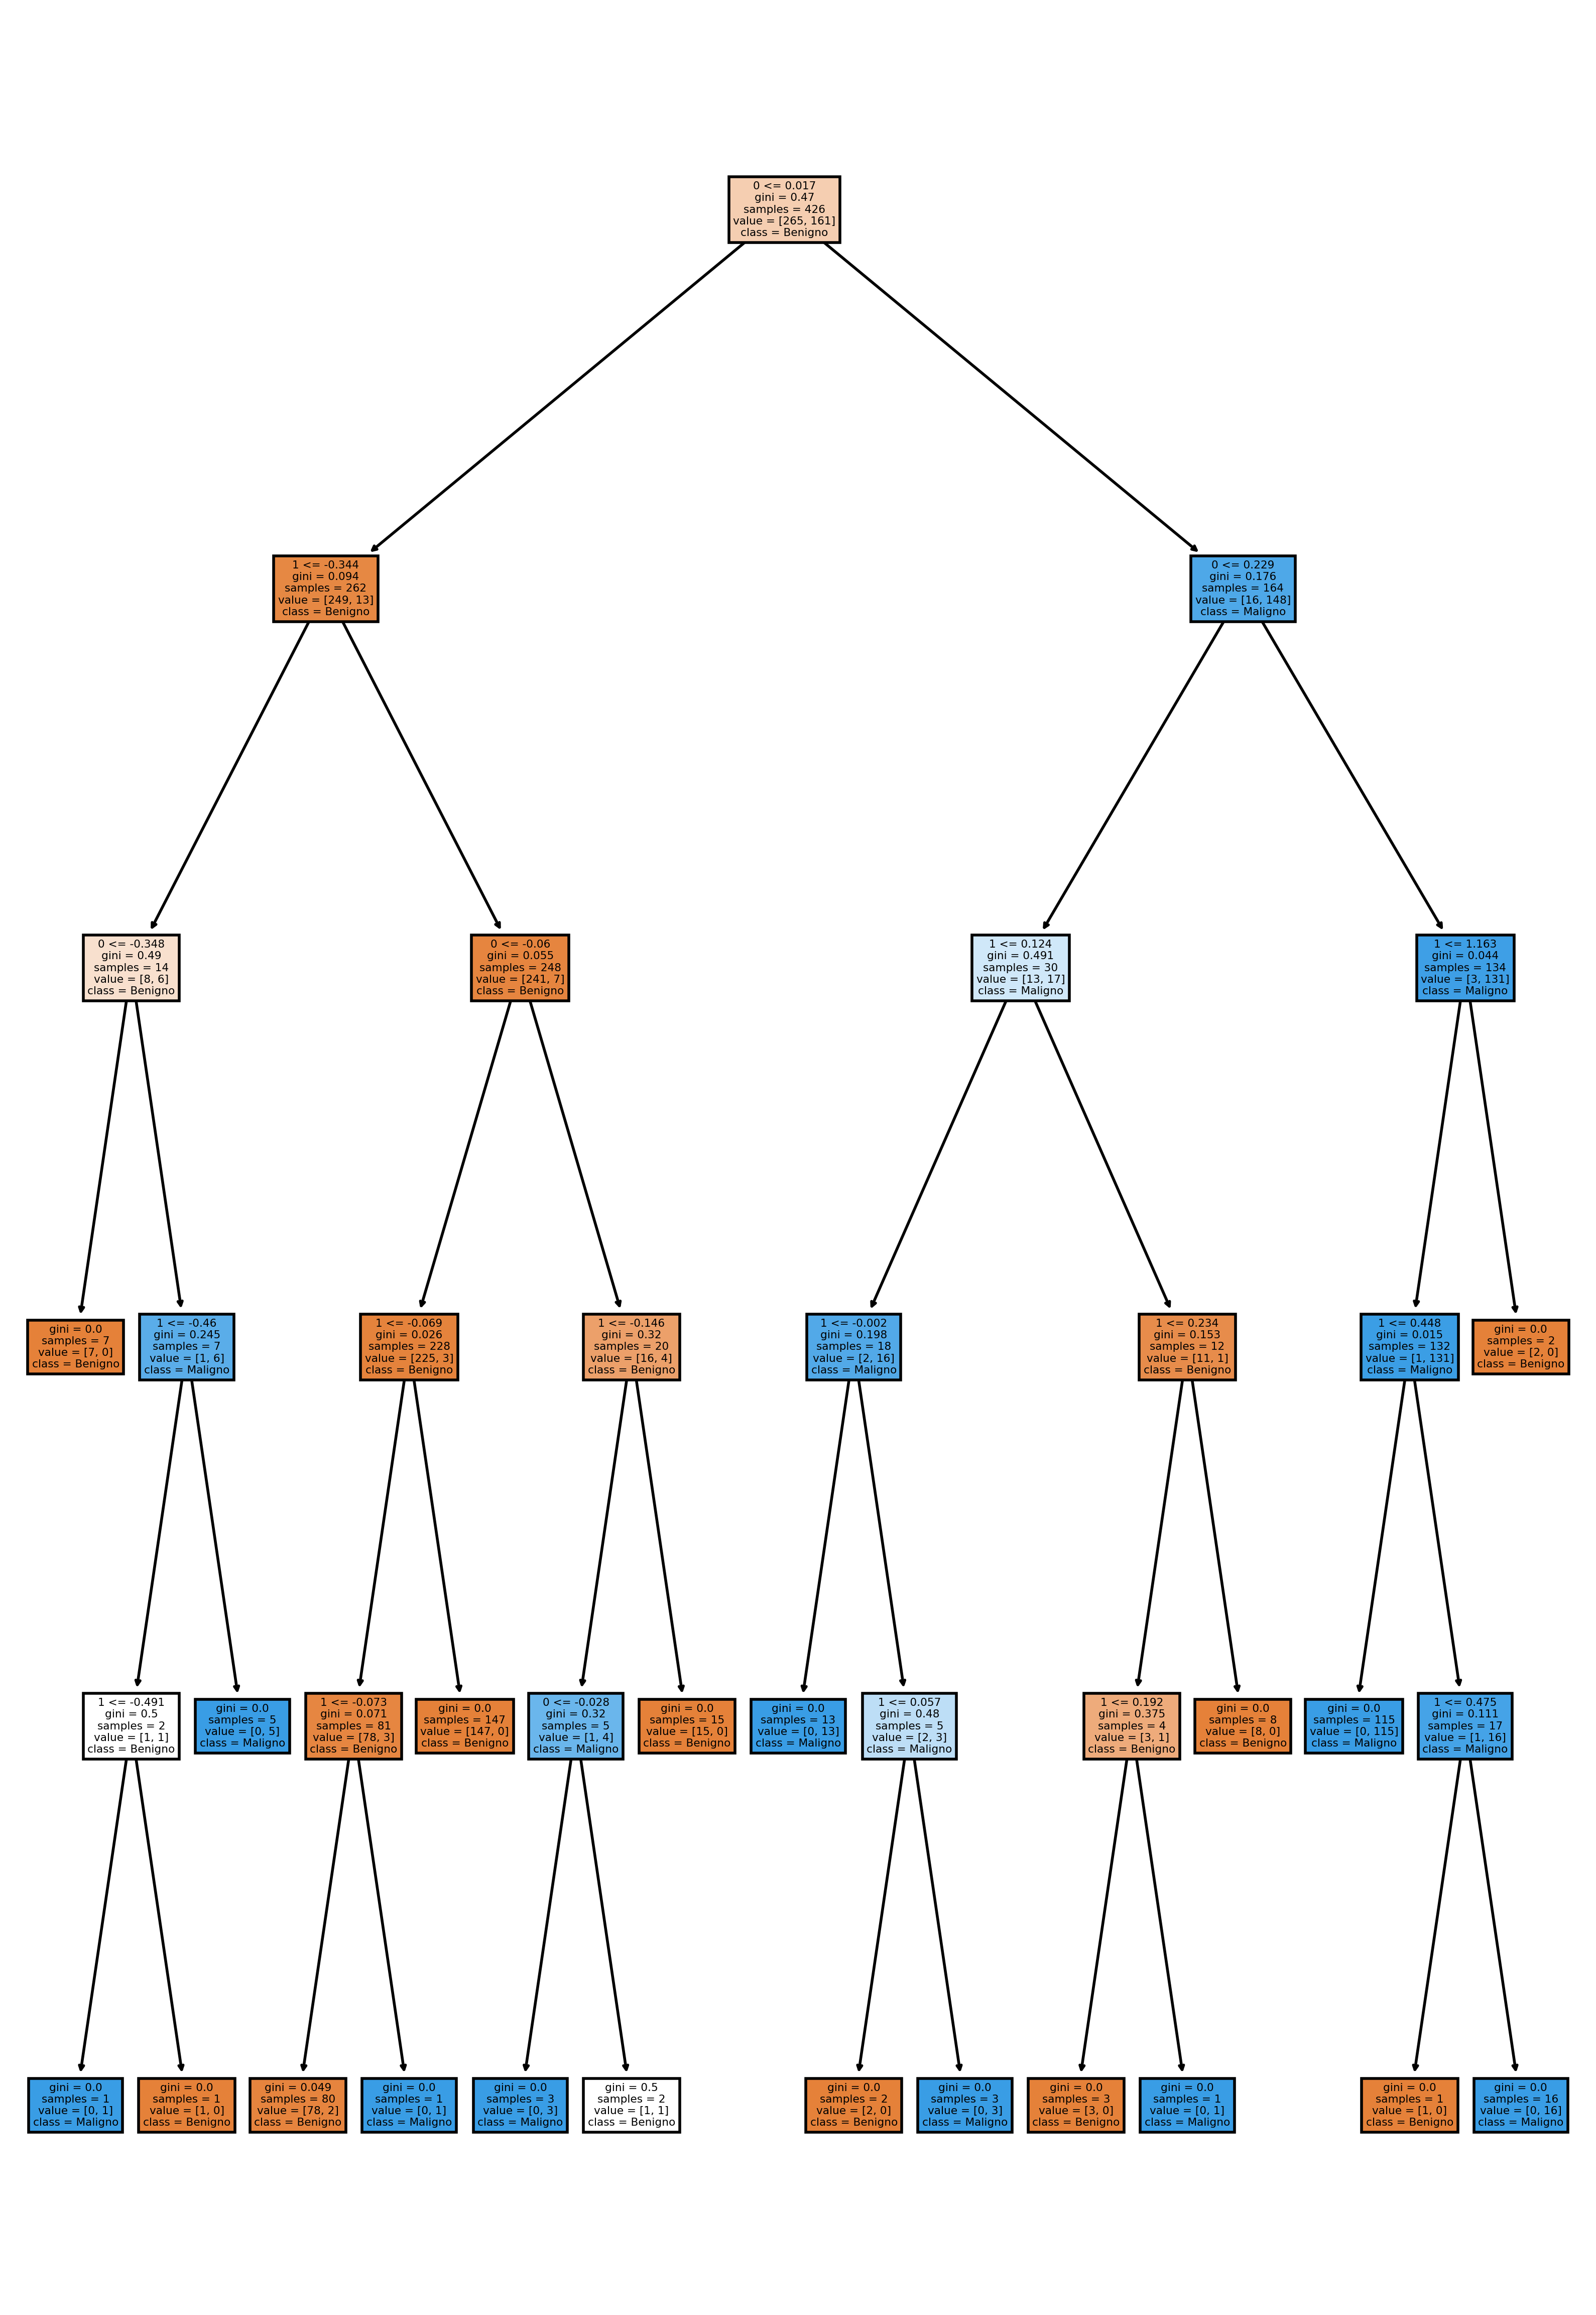

In [1848]:
# Generar modelo
dt2 = DecisionTreeClassifier(max_depth=5)

# Validación cruzada
vc = cross_val_score(dt2, X_train, y_train, cv=5)

# Media y desviación estándar
print("Media:\t\t\t\033[1m", vc.mean(), "\033[0m")
print("Desviación estándar:\t\033[1m", vc.std(), "\033[0m")

# Hacer fit con el conjunto de train
dt2.fit(X_train, y_train)

# Representar gráficamente
plt.subplots(nrows = 1,ncols = 1,figsize = (10, 15), dpi=400)
plot_tree(dt2, feature_names = X_train.columns, class_names = ["Benigno", "Maligno"], filled = True);

In [1849]:
# Dividir dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(bcw_low_pca, bcw["diagnosis"], test_size=0.25)

Media:			 0.8052257181942544 
Desviación estándar:	 0.04711131866669421 


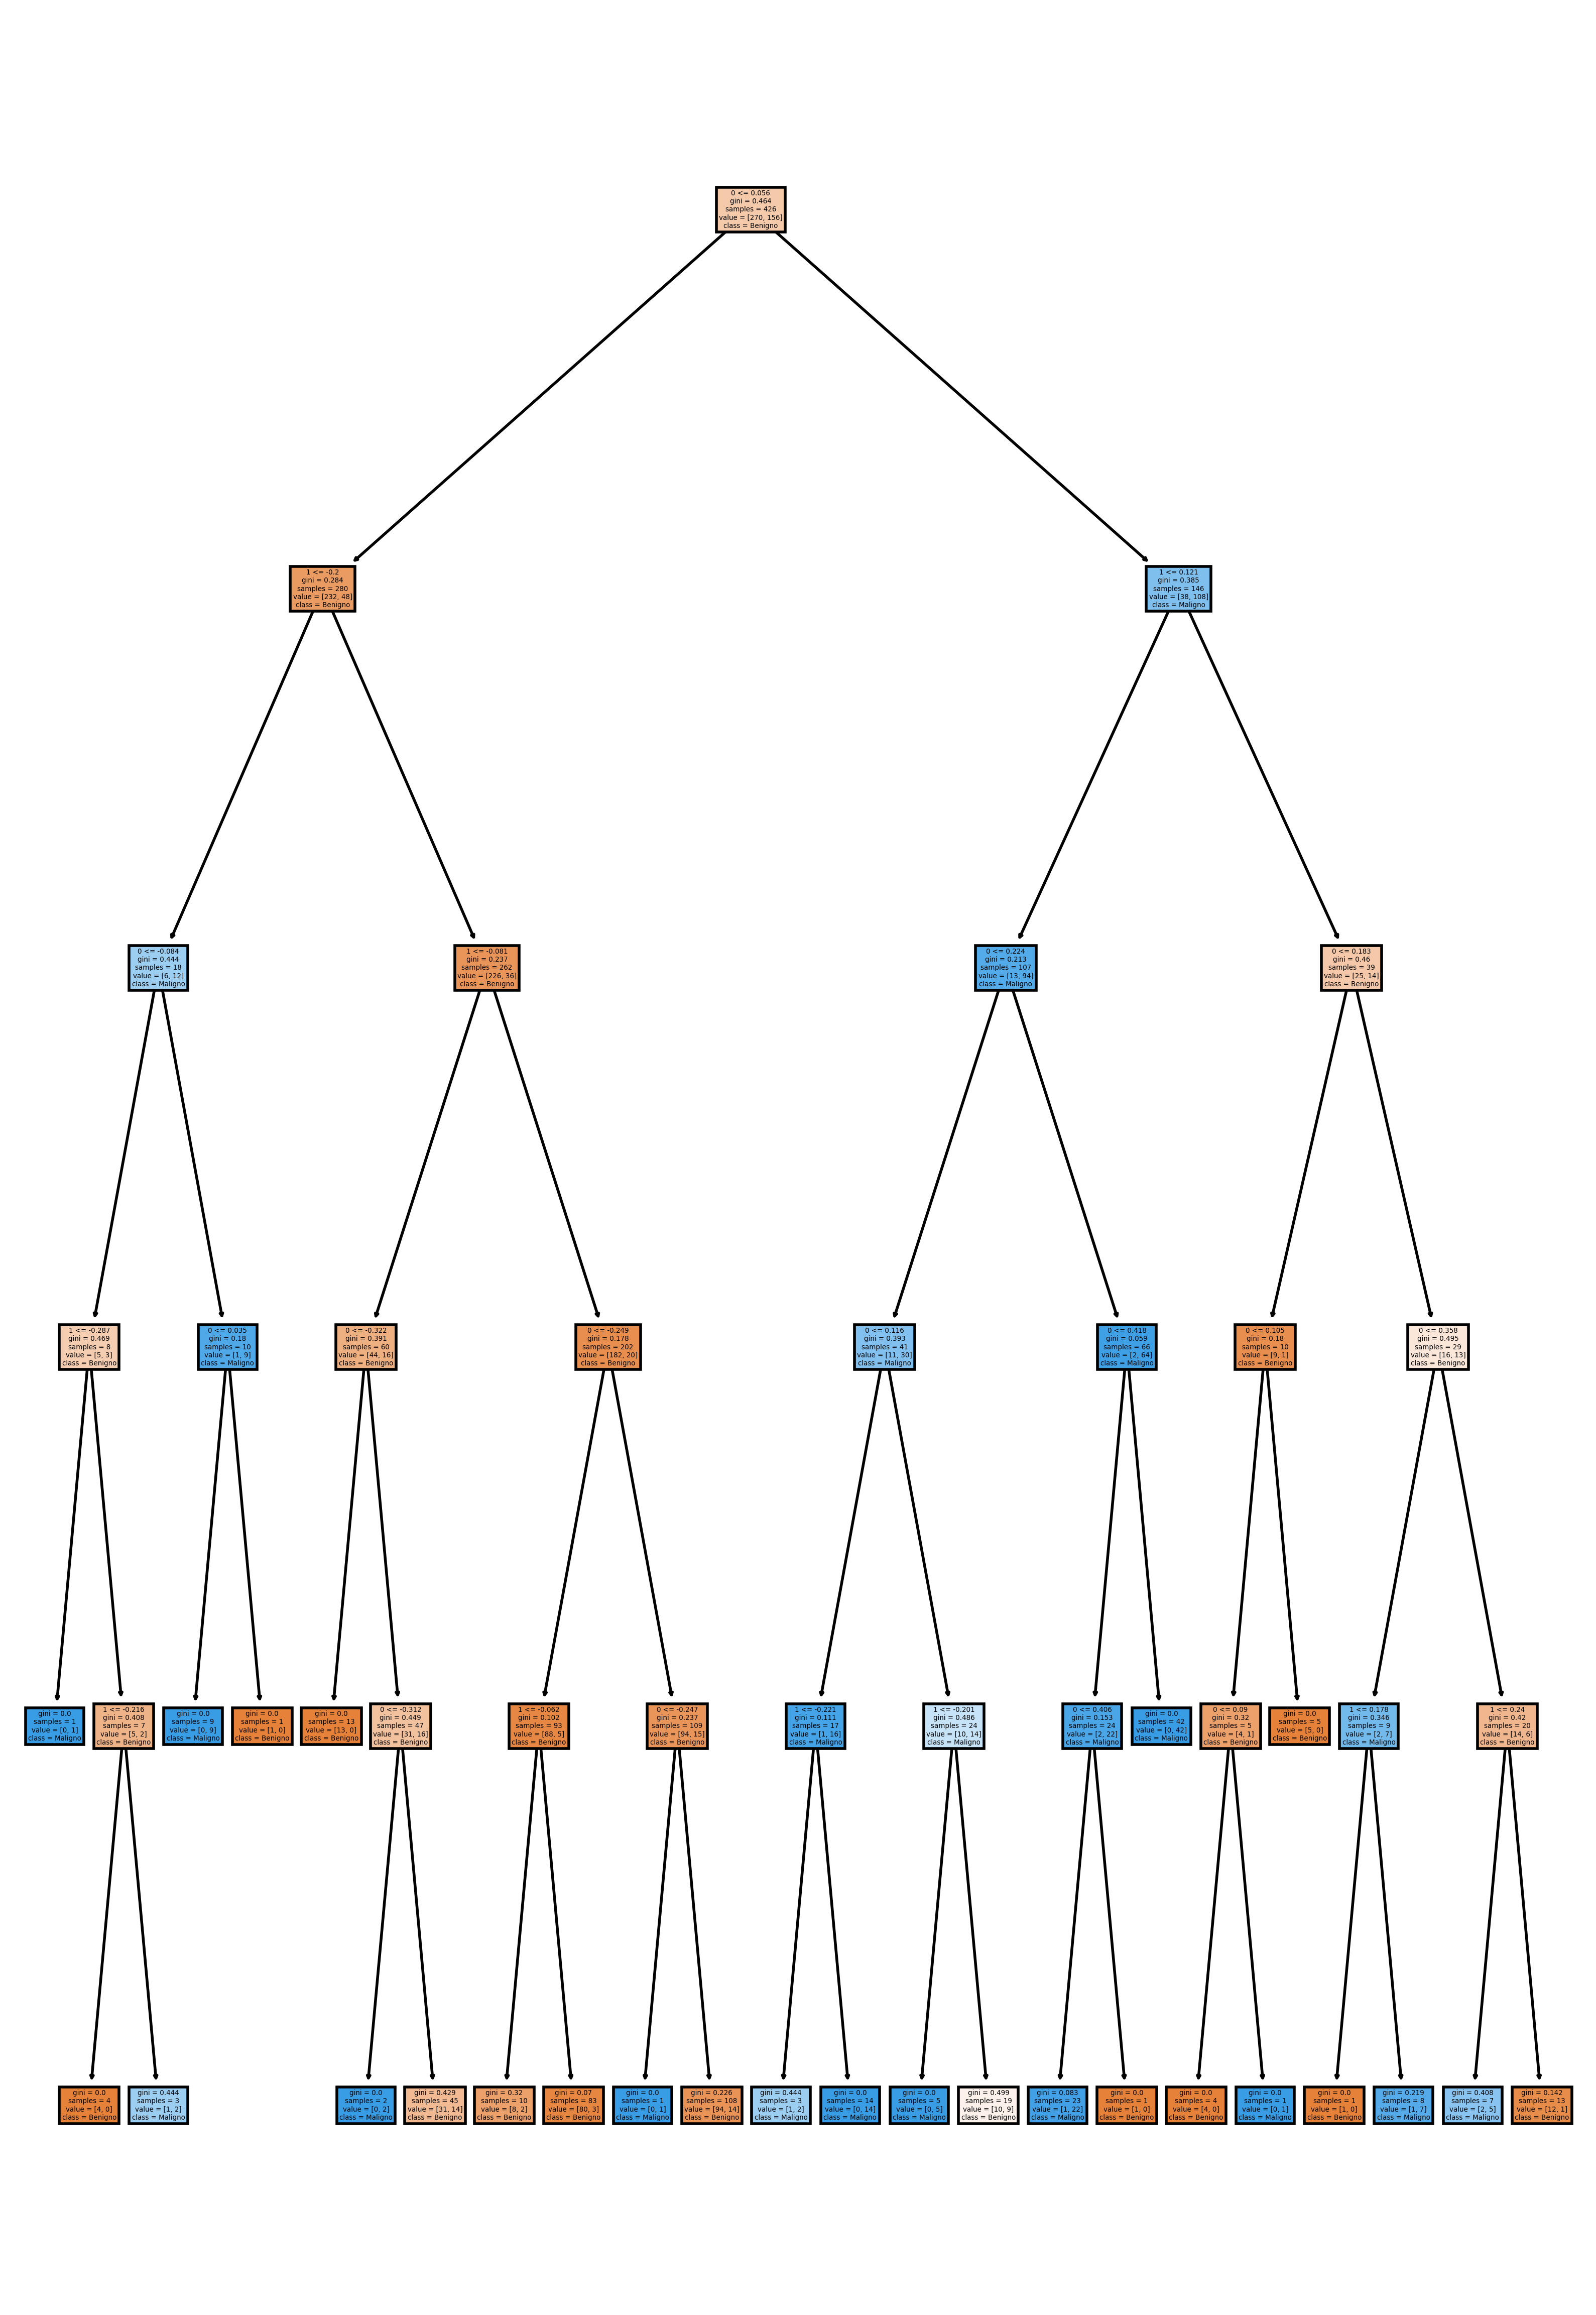

In [1850]:
# Generar modelo
dt3 = DecisionTreeClassifier(max_depth=5)

# Validación cruzada
vc = cross_val_score(dt3, X_train, y_train, cv=5)

# Media y desviación estándar
print("Media:\t\t\t\033[1m", vc.mean(), "\033[0m")
print("Desviación estándar:\t\033[1m", vc.std(), "\033[0m")

# Hacer fit con el conjunto de train
dt3.fit(X_train, y_train)

# Representar gráficamente
plt.subplots(nrows = 1,ncols = 1,figsize = (10, 15), dpi=400)
plot_tree(dt3, feature_names = X_train.columns, class_names = ["Benigno", "Maligno"], filled = True);

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> repetid el mismo procedimiento que en el ejercicio anterior con el conjunto de datos sin las variables fuertemente correlacionada y reducido a sólo 2 atributos con el método PCA.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿con qué datos ha funcionado mejor? ¿Tiene sentido? ¿Cuadra con los resultados que hemos visto en el ejercicio 3?
</div>

<font color=#0565A5>Los resultados obtenidos con el ***dataset completo*** no difieren tanto antes como después del **PCA**. Esto se debe a que las dos variables resultantes reúnen gran parte de la información del dataset para distinguir la clase (varianza aprox. 0.7 entre ambas), por lo que las demás variables no aportan esencialmente tanta información y se pueden prescindir de ellas si empeorar los resultados.

<font color=#0565A5>Por otro lado, al eliminar los atributos con mayor correlación se ha perdido una gran parte de la información esencia del dataset, y por ello los resultados obtenidos son bastante peores.

<font color=#0565A5>**Adicional:** como apunte, la reducción de dimensiones llevada a cabo mediante el **LDA** ofrece unos resultados bastante mejores que los anteriores pese a disponer tan solo de una variable. Cuando hemos graficado este atributo previamente, se diferenciaban claramente ambas clases. A continuación, realizaré el ejercicio anterior con este dataset para confirmarlo.

In [1851]:
# Dividir dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(bcw_lda, bcw["diagnosis"], test_size=0.25)

Media:			 0.97890560875513 
Desviación estándar:	 0.013636154435586842 


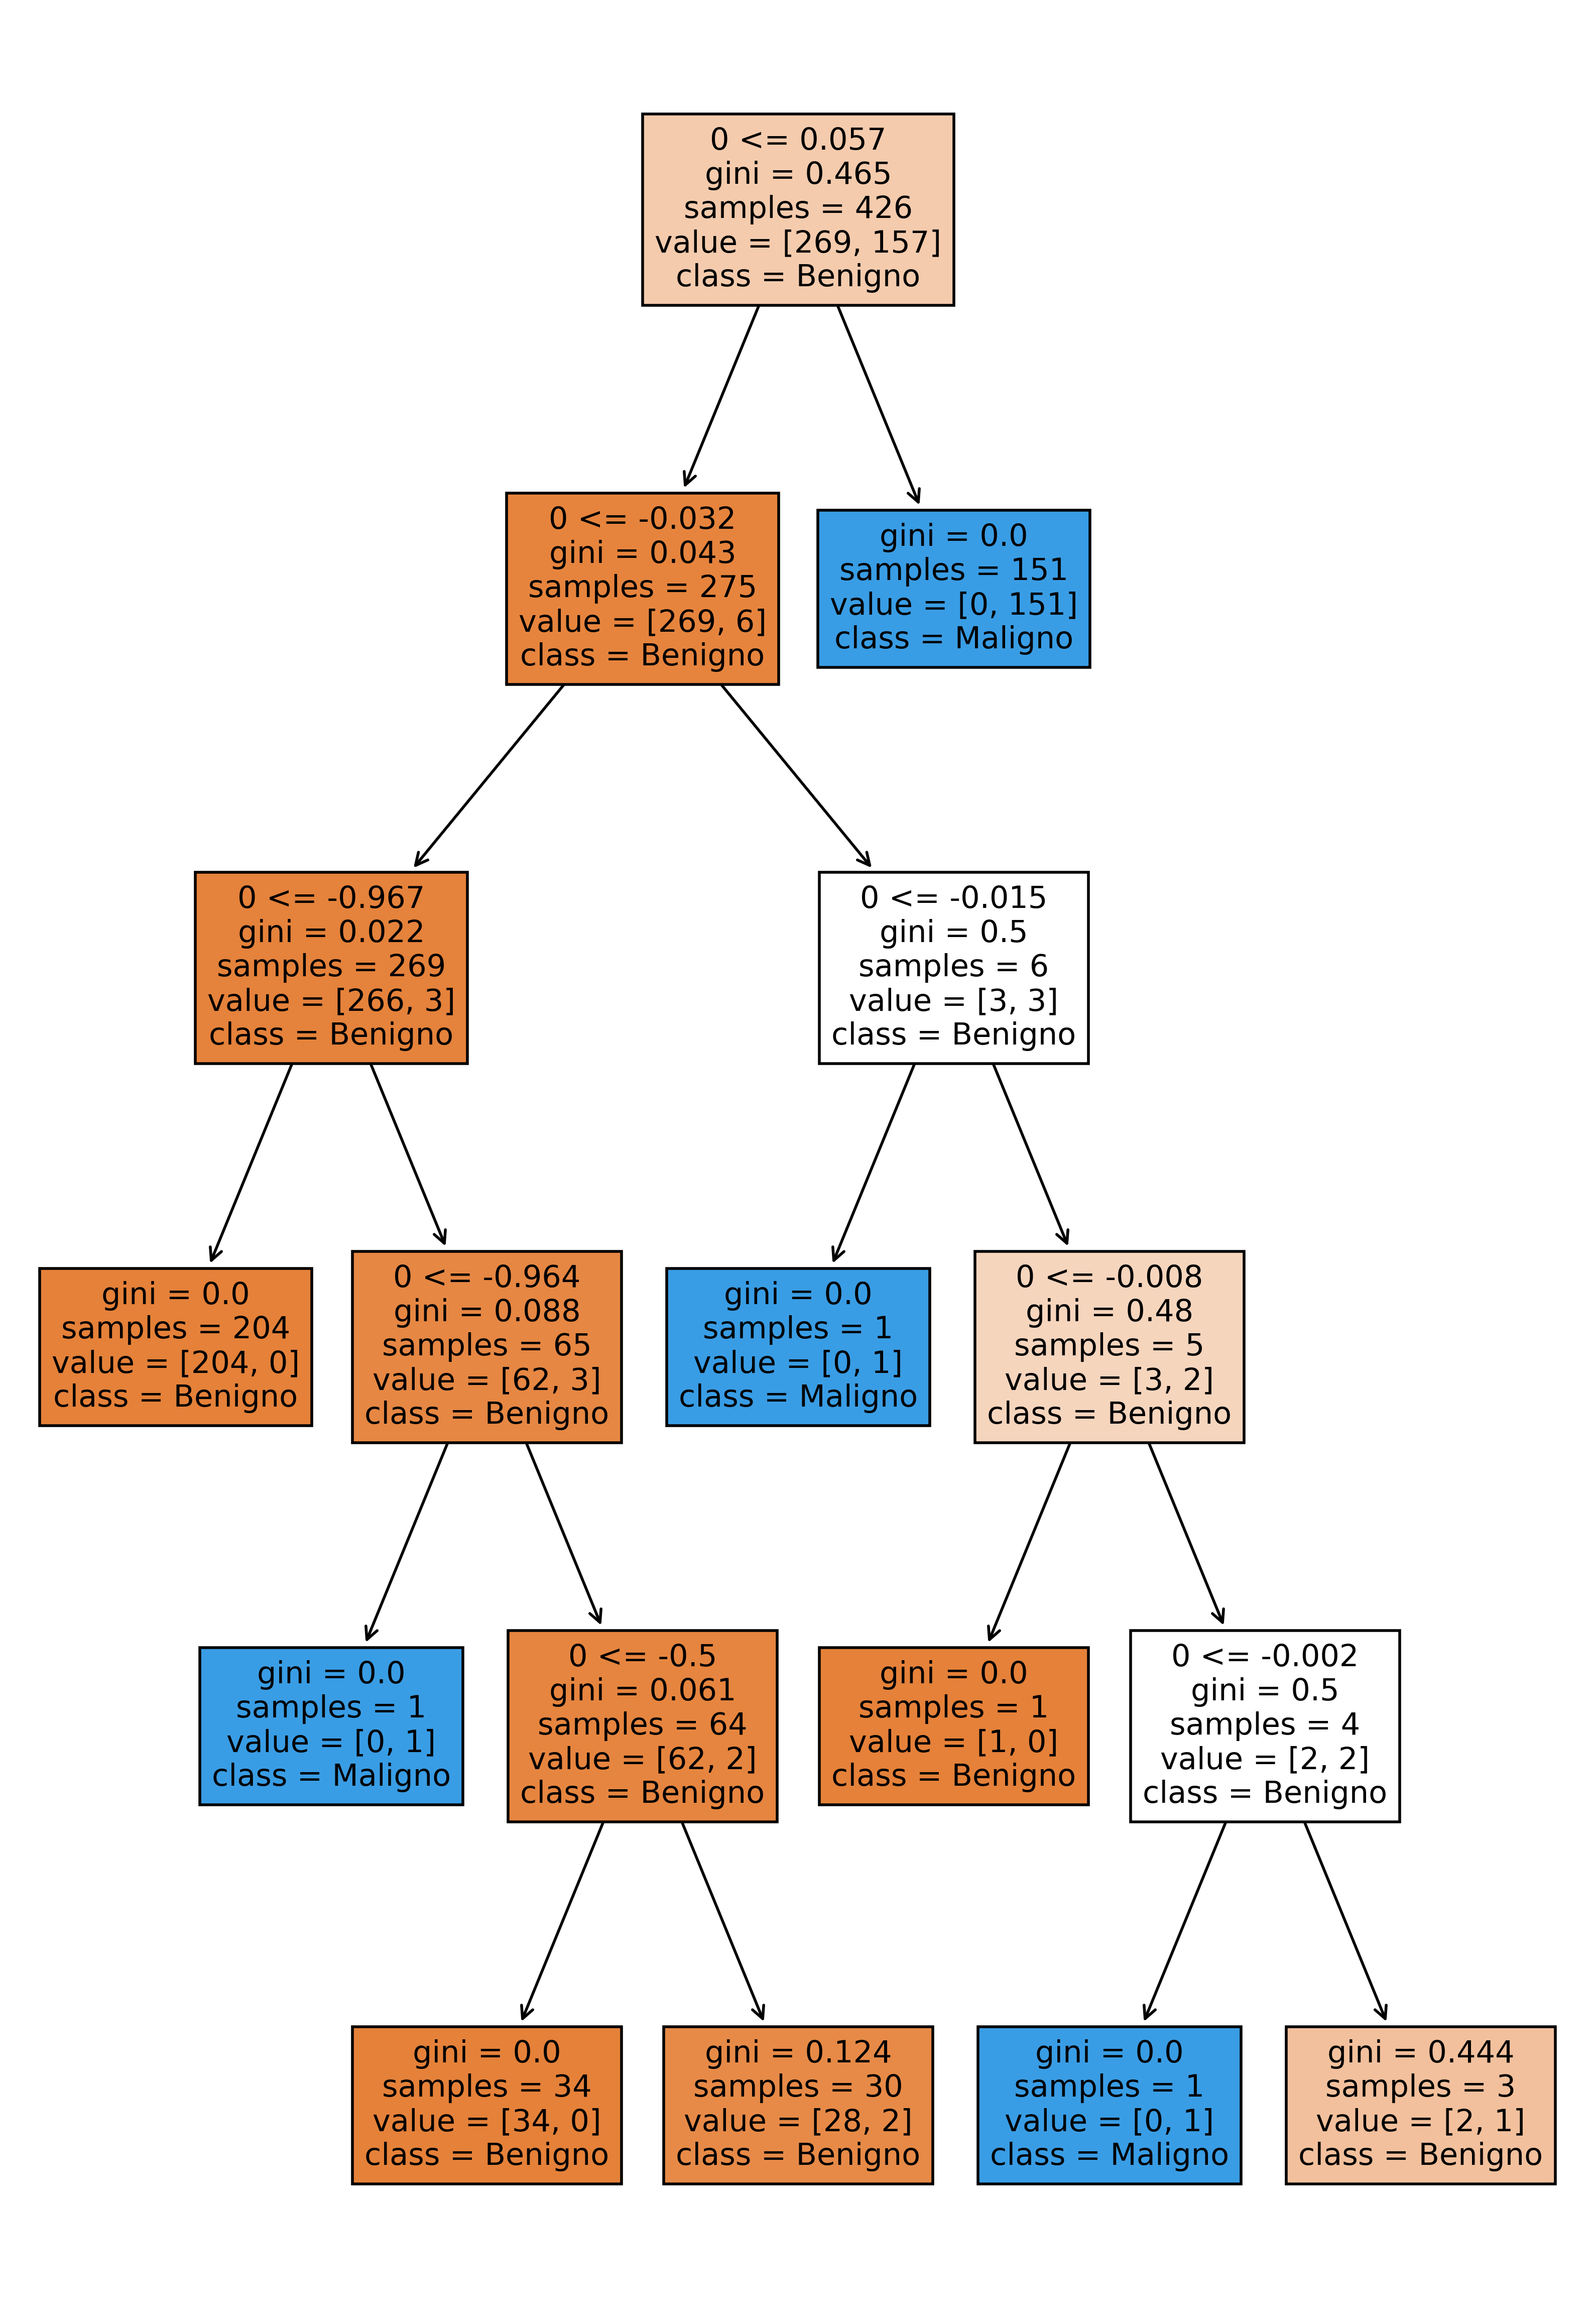

In [1852]:
# Generar modelo
dt4 = DecisionTreeClassifier(max_depth=5)

# Validación cruzada
vc = cross_val_score(dt4, X_train, y_train, cv=5)

# Media y desviación estándar
print("Media:\t\t\t\033[1m", vc.mean(), "\033[0m")
print("Desviación estándar:\t\033[1m", vc.std(), "\033[0m")

# Hacer fit con el conjunto de train
dt4.fit(X_train, y_train)

# Representar gráficamente
plt.subplots(nrows = 1,ncols = 1,figsize = (10, 15), dpi=400)
plot_tree(dt4, feature_names = X_train.columns, class_names = ["Benigno", "Maligno"], filled = True);

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> con el mejor modelo que hayáis obtenido:
    
 - Generad predicciones sobre el dataset de test.
 - Calculad la precisión de las predicciones obtenidas y la matriz de confusión asociada.
 
<hr>
Sugerencia: para calcular la precisión y la matriz de confusión podéis usar las funciones dentro del módulo "metrics" de sklearn.
</div>

<font color=#0565A5>El mejor modelo es el obtenido con el dataset completo sin el PCA. Sin embargo, el obtenido tras aplicar LDA es incluso mejor a éste, por lo que realizaré este ejercicio con ambos para ver las diferencias.

### <font color=#0565A5>Dataset original antes del PCA

In [1935]:
# Dividir dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(bcw.drop(["diagnosis"], 1), bcw["diagnosis"], test_size=0.25)

In [1936]:
y_pred = dt1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = {'Real: Benigno': cm[0], 'Real: Maligno': cm[1]}
cm = pd.DataFrame.from_dict(cm, orient = 'index', columns = ['Predicción: Benigno', 'Predicción: Maligno'])
print(classification_report(y_test, y_pred))
print("El rendimiento global del modelo es del \033[1m{}%\033[0m".format(round(accuracy_score(y_test,y_pred), 4)*100))
cm

              precision    recall  f1-score   support

           B       0.99      0.99      0.99        97
           M       0.98      0.98      0.98        46

    accuracy                           0.99       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143

El rendimiento global del modelo es del 98.6%


Predicción: Benigno  Predicción: Maligno
Real: Benigno                   96                    1
Real: Maligno                    1                   45

### <font color=#0565A5>Dataset original tras LDA

In [1940]:
# Dividir dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(bcw_lda, bcw["diagnosis"], test_size=0.25)

In [1941]:
y_pred = dt4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = {'Real: Benigno': cm[0], 'Real: Maligno': cm[1]}
cm = pd.DataFrame.from_dict(cm, orient = 'index', columns = ['Predicción: Benigno', 'Predicción: Maligno'])
print(classification_report(y_test, y_pred))
print("La precisión total del modelo es del: \033[1m{}%\033[0m".format(round(accuracy_score(y_test,y_pred), 4)*100))
cm

              precision    recall  f1-score   support

           B       1.00      1.00      1.00        87
           M       1.00      1.00      1.00        56

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

La precisión total del modelo es del: 100.0%


Predicción: Benigno  Predicción: Maligno
Real: Benigno                   87                    0
Real: Maligno                    0                   56